 # Анализ бизнес-показателей приложения Procrastinate Pro+

В данном проекте проведен анализ бизнес-показателей развлекательного приложения Procrastinate Pro+ в целях выявления основных причин убытков компании от данного приложения. Компания-заказчик осуществляет огромные вложения в рекламу, при этом последние несколько месяцев приложение не приносит прибыль. В рамках проекта выявлены факторы, которые мешают компании-заказчику привлекать клиентов.

**Цель** Выявить потенциальные причины убытков компании, в том числе причины неэффективности привлечения пользователей. Сформулировать на основе полученных результатов рекомендации для отдела маркетинга заказчика.

**Описание данных** Для анализа предоставлено три датасета в формате CSV-файлов. Файлы содержат информацию о посещениях сайта, заказах и рекламных расходах. Данные представлены за период с 2019-05-01 по 2019-10-27 (2019-11-01).
А именно: 

- файл visits_info_short о посещениях сайта:

    - id пользователей, страна, тип устройства,
    - источник перехода пользователя на сайт,
    - дата и время начала и окончания сессии;

- файл orders_info_short о заказах:

    - id пользователей,
    - дата и время покупки,
    - сумма заказа;

- файл costs_info_short о рекламных расходах:

    - дата проведения рекламной кампании,
    - рекламный источник,
    - количество расходов на рекламную кампанию.
    
**Содержание исследования**

Исследование разделено на несколько этапов.

На первом этапе изучена общая информация о файлах. Далее проведена предобработка данных: преобразованы типы данных, проведена проверка данных на пропуски, аномалии и выбросы. 

Затем выполнен исследовательский анализ данных, определены общие характеристики пользователей. Отдельно проанализированы марктеинговые показатели, рассмотрены показатели разных реклкмных источников и определены лидирующие. Впоследствии проанализирована окупаемость рекламы. Для этого были рассчитаны LTV, ROI, CAC, Convertion Rate, Retention Rate и построены графики соответствующие графики. 

На основе полученных результатов выявлены причины неэффективности привлечения пользователей, а также сформулированы рекомендации для отдела маркетинга.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-обзор-данных" data-toc-modified-id="Общий-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Тип-данных" data-toc-modified-id="Тип-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тип данных</a></span></li><li><span><a href="#Дубликаты-и-аномалии" data-toc-modified-id="Дубликаты-и-аномалии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты и аномалии</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#Функция-для-создания-пользовательских-профилей" data-toc-modified-id="Функция-для-создания-пользовательских-профилей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для создания пользовательских профилей</a></span></li><li><span><a href="#Функция-для-подсчёта-Retention-Rate" data-toc-modified-id="Функция-для-подсчёта-Retention-Rate-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция для подсчёта Retention Rate</a></span></li><li><span><a href="#Функция-для-посчета-Conversion-Rate" data-toc-modified-id="Функция-для-посчета-Conversion-Rate-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Функция для посчета Conversion Rate</a></span></li><li><span><a href="#Функция-для-подсчета-LTV-и-ROI" data-toc-modified-id="Функция-для-подсчета-LTV-и-ROI-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Функция для подсчета LTV и ROI</a></span></li><li><span><a href="#Функция-для-сглаживания-фрейма" data-toc-modified-id="Функция-для-сглаживания-фрейма-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Функция для сглаживания фрейма</a></span></li><li><span><a href="#Функция-для-построения-графика-Retention-Rate" data-toc-modified-id="Функция-для-построения-графика-Retention-Rate-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Функция для построения графика Retention Rate</a></span></li><li><span><a href="#Функция-для-построения-графика-конверсии" data-toc-modified-id="Функция-для-построения-графика-конверсии-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Функция для построения графика конверсии</a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Функция для визуализации LTV и ROI</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Профили-пользователей.-Минимальные-и-максимальные-даты-привлечения" data-toc-modified-id="Профили-пользователей.-Минимальные-и-максимальные-даты-привлечения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Профили пользователей. Минимальные и максимальные даты привлечения</a></span></li><li><span><a href="#Страны-пользователей" data-toc-modified-id="Страны-пользователей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Страны пользователей</a></span></li><li><span><a href="#Тип-устройств" data-toc-modified-id="Тип-устройств-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Тип устройств</a></span></li><li><span><a href="#Рекламные-источники" data-toc-modified-id="Рекламные-источники-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Рекламные источники</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Распределение-трат-по-рекламным-источникам.-Общая-сумму-расходов-на-маркетинг" data-toc-modified-id="Распределение-трат-по-рекламным-источникам.-Общая-сумму-расходов-на-маркетинг-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Распределение трат по рекламным источникам. Общая сумму расходов на маркетинг</a></span></li><li><span><a href="#Динамика-изменения-рекламных-затрат-по-каждому-источнику" data-toc-modified-id="Динамика-изменения-рекламных-затрат-по-каждому-источнику-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Динамика изменения рекламных затрат по каждому источнику</a></span></li><li><span><a href="#Динамика-изменения-рекламных-затрат-нелидирующих-источников" data-toc-modified-id="Динамика-изменения-рекламных-затрат-нелидирующих-источников-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Динамика изменения рекламных затрат нелидирующих источников</a></span></li><li><span><a href="#Cтоимость-привлечения-одного-пользователя-(САС)" data-toc-modified-id="Cтоимость-привлечения-одного-пользователя-(САС)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Cтоимость привлечения одного пользователя (САС)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#LTV,-CAC-и-ROI" data-toc-modified-id="LTV,-CAC-и-ROI-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>LTV, CAC и ROI</a></span></li><li><span><a href="#Convertion-rate-(CR),-Retention-rate-(RR)-и-динамики-их-изменений" data-toc-modified-id="Convertion-rate-(CR),-Retention-rate-(RR)-и-динамики-их-изменений-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convertion rate (CR), Retention rate (RR) и динамики их изменений</a></span></li><li><span><a href="#Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-устройствам-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Окупаемость рекламы, CR и RR с разбивкой по устройствам</a></span><ul class="toc-item"><li><span><a href="#Конверсия-и-удержание-по-устройствам" data-toc-modified-id="Конверсия-и-удержание-по-устройствам-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Конверсия и удержание по устройствам</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-странам-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Окупаемость рекламы, CR и RR с разбивкой по странам</a></span><ul class="toc-item"><li><span><a href="#Конверсия-и-удержание-по-странам" data-toc-modified-id="Конверсия-и-удержание-по-странам-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Конверсия и удержание по странам</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-рекламным-источникам" data-toc-modified-id="Окупаемость-рекламы,-CR-и-RR-с-разбивкой-по-рекламным-источникам-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Окупаемость рекламы, CR и RR с разбивкой по рекламным источникам</a></span><ul class="toc-item"><li><span><a href="#Конверсия-и-удержание-по-рекламным-источникам" data-toc-modified-id="Конверсия-и-удержание-по-рекламным-источникам-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Конверсия и удержание по рекламным источникам</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы-среди-пользователей-из-США-по-рекламным-источникам-и-устройствам" data-toc-modified-id="Окупаемость-рекламы-среди-пользователей-из-США-по-рекламным-источникам-и-устройствам-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Окупаемость рекламы среди пользователей из США по рекламным источникам и устройствам</a></span></li><li><span><a href="#Вывод.-Окупаемость-рекламы" data-toc-modified-id="Вывод.-Окупаемость-рекламы-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Вывод. Окупаемость рекламы</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span></li></ul></div>

## Общий обзор данных

Для первичного анализа данных выведем первые строки каждого датасета на экран и изучим общую информацию о них.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

from datetime import datetime, timedelta
from matplotlib import pyplot as plt


# установление опции форматирования для данных типа float с округлением до 2 символов после запятой,
# чтобы избавиться от отображения с экспонентой

pd.options.display.float_format = '{:.2f}'.format

In [2]:
visits = pd.read_csv('-------') 
orders = pd.read_csv('-------')
costs = pd.read_csv('-------') 

In [3]:
# создаем функцию для вывода общей информации о датасете
# создаем функцию для вывода информации о числе пользователей и анализируемом периоде в датасете

def get_general_info(df):
    print('')
    df.info()
    display(df.head())
    print('*'*50)
    print(f'Количество пропусков во всем датасете составляет {df.isna().sum().sum()}.')
    print('*'*50)
    print('Таблица с пропусками в датасете:')
    display(df.isna().sum().sort_values().reset_index())
    print(f'Общее количество строк составляет {len(df)}.')
    print('*'*50)
    print(f'Количество полностью совпадающих строк составляет {df.duplicated().sum()}.')
    print('*'*50)
    

def print_data(user_id, dt_1, dt_2):
    if user_id is not None:
        print(f'Число уникальных пользователей: {user_id.nunique()}.', 
              f'Период совершения действий: от {pd.to_datetime(dt_1).dt.date.min()}',
              f'до {pd.to_datetime(dt_2).dt.date.max()}.')
    else:
        print(f'Период в которых проводились рекламные кампании: от {pd.to_datetime(dt_1).dt.date.min()}',
              f'до {pd.to_datetime(dt_2).dt.date.max()}.')

In [4]:
# выводим общую информацию о датасете с посещениями

get_general_info(visits)
print_data(visits["User Id"], visits["Session Start"], visits["Session End"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0        User Id  0
1         Region  0
2         Device  0
3        Channel  0
4  Session Start  0
5    Session End  0

Общее количество строк составляет 309901.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Число уникальных пользователей: 150008. Период совершения действий: от 2019-05-01 до 2019-11-01.


In [5]:
# выводим общую информацию о датасете с заказами

get_general_info(orders)
print_data(orders["User Id"], orders["Event Dt"], orders["Event Dt"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0   User Id  0
1  Event Dt  0
2   Revenue  0

Общее количество строк составляет 40212.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Число уникальных пользователей: 8881. Период совершения действий: от 2019-05-01 до 2019-10-31.


In [6]:
# выводим общую информацию о датасете с покупками

get_general_info(costs)
print_data( None, costs["dt"], costs["dt"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0       dt  0
1  Channel  0
2    costs  0

Общее количество строк составляет 1800.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Период в которых проводились рекламные кампании: от 2019-05-01 до 2019-10-27.


### Вывод

Исследуемые файлы представляют собой таблицы с данными.

Файл **visits** о посещениях сайта представлен таблицей из 6 столбцов и 309 901 строк о странах, типах устройств, источнике перехода, датой начала и окончания сессии в отношении 150 008 уникальных пользователей за период с 2019-05-01 по 2019-11-01. 

Файл **orders** о заказах представлен таблицей из 3 столбцов и 40 212 строк o сумме покупок в отношении 8 881 уникального пользователя за период с 2019-05-01 до 2019-10-31. 

Файл **costs** о рекламных расходах представлен таблицей из 3 столбцов и 1 800 строк о расходах на рекламные компании за период с 2019-05-01 до 2019-10-27. 

**Тип данных** в датасетах неоднородный: `object`, `float64`, `int64`.

Типы данных столбцов с датами и временем во всех датасетах требуют преобразования. Например, столбцы *Session Start* и *Session End* в файле с данными о посещениях, указывают на даты начала и окончания сессии пользователя. Данные столбцы имеют тип данных object. Вместе с тем, для удобной и корректной работы с датами в Python существует специальный тип `datetime`.


**Дубликаты и аномалии** В датасете нет полностью совпадающих строк. Однако это не исключает наличие неявных дубликатов, что необходимо проверить. Помимо указанного, необходимо проверить данные на аномалии и обработать их.

**Пропуски** В датасетах нет пропущенных значений.

Для дальнейшего удобства работы с датасетами, названия столбцов будут переименованы (заглавные буквы заменены на строчные, вместо пробелов - нижнее подчеркивание).

После предварительного просмотра, до предобработки данных, объединим общую информацию о датасетах.

| **Столбец** | **Тип данных** | **Пропуски** | **Описание** |
|:--------|:--------:|:--------:|:--------|
| **Датасет `visits` с данными о посещениях** |
|User Id |  int64  |  0  | уникальный идентификатор пользователя |
|Region |  object  |  0  | страна пользователя|
|Device |  object  |  0  | тип устройства пользователя|
|Channel |  object  |  0  | идентификатор-название источника перехода |
|Session Start |  object  |  0  | дата и время начала сессии |
|Session End |  object  |  0  | дата и время окончания сессии |
| **Датасет `orders` с данными о заказах**|
|User Id |  int64  |  0  | уникальный идентификатор пользователя |
|Event Dt |  object  |  0  | дата и время покупки |
|Revenue |  float64  |  0  | сумма заказа |
| **Датасет `costs` с данными о расходах на рекламу** |
|dt |  object  |  0  | дата проведения рекламной кампании |
|Channel |  object  |  0  | идентификатор-название рекламного источника |
|costs |  float64  |  0  | расходы на рекламную кампанию |

## Предобработка данных

В рамках предобработки данных изменим тип данных на корректный; выявим дубликаты, аномалии и обработаем их.

In [7]:
# переименуем столбцы во всех датасетах, приведем к "змеиному" стилю

def rename_columns (df):
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

rename_columns(visits)
rename_columns(orders)
rename_columns(costs)

In [8]:
# создаем копии датасетов до преобразования
visits_before = visits.copy()
orders_before = orders.copy()
costs_before = costs.copy()

### Тип данных

Преобразуем типы данных столбцов с датой и временем во всех датасетах. 

Затем проверим корректность типа данных у остальных столбцов.

In [9]:
# преобразуем типы данных в столбцах с датой и временем

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [10]:
# проверим типы данных в остальных столбцах, где тип object

def show_types(column):
    if column.dtype == 'O':
        print(f'У столбца {column.name} встречаются следующие типы данных:') 
        display(column.map(type).value_counts())

        
visits.apply(show_types)
orders.apply(show_types)
costs.apply(show_types);

У столбца region встречаются следующие типы данных:


<class 'str'>    309901
Name: region, dtype: int64

У столбца device встречаются следующие типы данных:


<class 'str'>    309901
Name: device, dtype: int64

У столбца channel встречаются следующие типы данных:


<class 'str'>    309901
Name: channel, dtype: int64

У столбца dt встречаются следующие типы данных:


<class 'datetime.date'>    1800
Name: dt, dtype: int64

У столбца channel встречаются следующие типы данных:


<class 'str'>    1800
Name: channel, dtype: int64

**Вывод**

На данном этапе исследования типы данных преобразованы во всех датасетах в столбцах с датой и временем - тип данных заменен на тип данных `datetime`. В остальных столбцах тип данных установлен корректно.

### Дубликаты и аномалии

В датасетах не было обнаружено полностью совпадающих строк. Попробуем найти неявные дубликаты.

При обработке и поиске аномалий:

- удалим все пробелы и лишнюю пунктуацию во всех столбцах с типом данных `str`,
- найдем подозрительные строки: с кириллицей; с 2 и менее символами, состоящие только из цифр,
- проверим длину id пользователей,
- проверим, что нет строк, где сессия пользователя закончилась раньше, чем началась,
- проверим, что нет строк, где для одного времени начала сессии пользователя указаны разные рекламные источники,
- проверим, что все id из датасета с рекламными тратами присутствуют в датасете с посещениями,
- проверим, что уникальные значения совпадающих столбцов у разных датасетов совпадают,

При поиске дубликатов: 
- проверим, что нет строк, где совпадают id и время начала/окончания сессии,
- проверим, что нет строк, где совпадают id и время начала, но разные рекламные источники/устройства.

Затем проверим уникальные значения столбцов.

Начнем с поиска аномалий.

In [11]:
# создаем функцию по удалению пробелов и знаков препинания во всех строках всех датасетов

def remove_punctuation(column):
    if column.dtype == 'O':
        try:
            column.str.strip()
            column.str.rstrip('!')
            column.str.rstrip('.')
        except:
            print(f"Не удалось обработать столбец {column.name}.")
            
# создаем функцию по поиску строк с кириллицей;  
                          # строк, в которых символов 2 и менее;  
                          # строк, которые состоят только из цифр

def check_str(column):
    if column.dtype == 'O':
        print()
        try:
            list_cyrillic = []
            list_short_str = []
            list_number = []
            for value in column.unique():
                r = re.findall(r'[а-яА-ЯёЁ]+', value)
                if r != []:
                    list_cyrillic.append(value)
                elif len(value) <= 2:
                    list_short_str.append(value)
                elif value.isdigit() == True:
                    list_number.append(value)
            if len(list_cyrillic) > 0:
                print(f'В столбце {column.name} найдены строки с кириллицей {list_cyrillic}')
            if len(list_short_str) > 0:
                print(f'В столбце {column.name} найдены аномально короткие строки: {list_short_str}.')
            if len(list_number) > 0:
                print(f'В столбце {column.name} найдено число: {list_number}.')
        except:
            print(f"Не удалось обработать столбец {column.name}.")

In [12]:
# создаем функцию по поиску неявных дубликатов среди уникальных значений столбца из-за разницы в регистре

def print_duplicates_by_register(column):
    if column.dtype == 'O':
        try:
            lower_list = []
            for value in column.unique().tolist():
                if value.lower() not in lower_list:
                    lower_list.append(value.lower())
            if len(column.unique()) != len(lower_list):
                print(f'В столбце {column.name} есть неявные дубликаты: {result}.')
        except:
            print(f"Не удалось обработать столбец {column.name}.")   

# создаем функцию по проверке уникальных значений столбцов c id и рекламными источниками в разных датасетах

def compare_unique_values(df1, df2, df3):
    if len(df1.loc[df1['user_id'].isin(df2['user_id']) == False]) > 0:
        display(df1.loc[df1['user_id'].isin(df2['user_id']) == False])     
        
    elif len(df3.loc[(df3['channel'].isin(df2.query('channel != "organic"')['channel']))  == False]) > 0:
        display(df3.loc[(df3['channel'].isin(df2.query('channel != "organic"')['channel']))  == False])
    else:
        print('Уникальные значения совпадающих столбцов в датасетах совпадают.')

In [13]:
# создаем и вызываем функцию по вызову функций, где в отношении каждого датасета 
    # вызываем функции по 1) коррекции пунктуации, 
    # 2) поиску аномальных строк (кириллица, мало символов, только цифры),
    # 3) по поиску неявных дубликатов из-за разных регистров

def call_functions(df, df_name):
    print(f'Датасет {df_name}')
    df.apply(remove_punctuation)
    df.apply(print_duplicates_by_register)
    df.apply(check_str)
    print('---')
    
call_functions(visits, "visits")
call_functions(orders, "orders")
call_functions(costs, "costs")


# проверяем, что уникальные значения одинаковых по содержанию столбцов
# совпадают в разных датасетах

compare_unique_values(orders, visits, costs)

Датасет visits

В столбце region найдены аномально короткие строки: ['UK'].

В столбце device найдены аномально короткие строки: ['PC'].

---
Датасет orders
---
Датасет costs
Не удалось обработать столбец dt.
Не удалось обработать столбец dt.

Не удалось обработать столбец dt.

---
Уникальные значения совпадающих столбцов в датасетах совпадают.


In [14]:
# дополнительно проверим датасет visits
# проверим столбец user_id в visits на аномальное количество цифр
 
id_list = []
for value in visits['user_id'].unique():
    if len(str(value)) not in id_list:
                    id_list.append(len(str(value)))
print(f'\nВстречающаяся длина "user_id": {sorted(id_list)}.')


# создаем и вызываем функцию по проверке того, что нет строк, где окончание сессии произошло раньше, чем начало сессии

def print_negative_session(row):
    dt_1 = row["session_start"]
    dt_2 = row["session_end"]
    if dt_2 < dt_1:
        print('Найдена строка с противоречивыми данными:')
        display(visits.query('session_start == @dt_1 and session_end == @dt_2'))
visits.apply(print_negative_session, axis=1)

# проверяем, есть ли в visits строки c одинаковым id и временем начала/окончания сессии
print('\nСтроки, где у одного пользователя несколько сессий начинаются в одно и тоже время:',
      len(visits[visits.duplicated(subset=('user_id', 'session_start'))]))
print('\nСтроки, где у одного пользователя несколько заканчиваются начинаются в одно и тоже время:', 
      len(visits[visits.duplicated(subset=('user_id', 'session_end'))]))


#проверяем, есть ли строки с одним id и разными устройствами
#и есть ли строки с одним id и разными устройствами в одно и тоже начало сессии
print('\nСтроки, где y одного пользователя разные типы устройств:', \
      ((visits.groupby('user_id') ['device'].nunique() > 1) == True).sum())
print('\nСтроки, где y одного пользователя в одно и тоже время начала сессии разные типы устройств', \
      ((visits.groupby(['user_id', 'session_start']) ['device'].nunique() > 1) == True).sum())


# # проверяем, есть ли в visits строки с одним id и разными рекламными источниками
# # и есть ли строки с одним id и разными рекламными источниками в одно и тоже начало сессии
print('\nСтроки, где y одного пользователя разные рекламные источники:', \
      ((visits.groupby('user_id') ['channel'].nunique() > 1) == True).sum())
print('\nСтроки, где y одного пользователя в одно и тоже время начала сессии разные рекламные источники:', \
      ((visits.groupby(['user_id', 'session_start']) ['channel'].nunique() > 1) == True).sum())



Встречающаяся длина "user_id": [6, 7, 8, 9, 10, 11, 12].

Строки, где у одного пользователя несколько сессий начинаются в одно и тоже время: 0

Строки, где у одного пользователя несколько заканчиваются начинаются в одно и тоже время: 0

Строки, где y одного пользователя разные типы устройств: 5007

Строки, где y одного пользователя в одно и тоже время начала сессии разные типы устройств 0

Строки, где y одного пользователя разные рекламные источники: 5520

Строки, где y одного пользователя в одно и тоже время начала сессии разные рекламные источники: 0


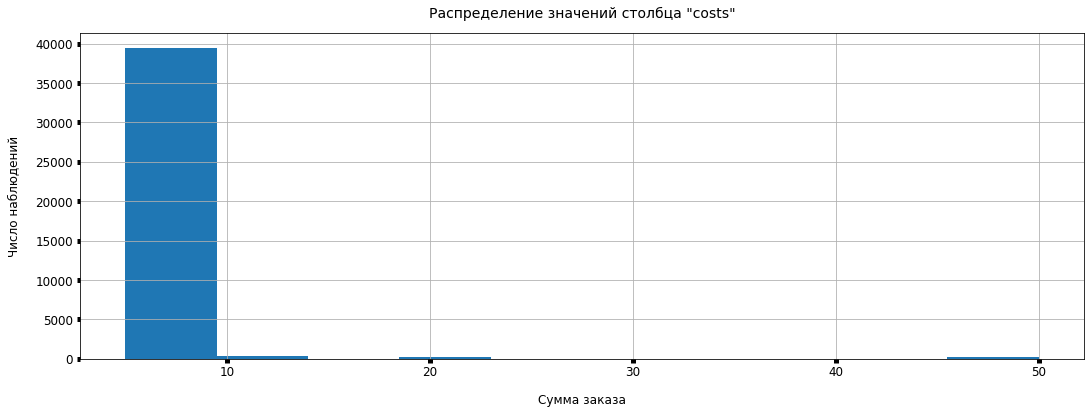

In [15]:
# посмотрим на распределение значений столбца revenue в датасете orders

ax = orders['revenue'].hist(bins=10, figsize=(18,6))
ax.set_title('Распределение значений столбца "costs"', fontsize=14, pad=15)
ax.set_xlabel('Сумма заказа', fontsize=12, labelpad=15)
ax.set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)
plt.show()

Распределение значений столбца "costs" в датасете costs корректное, представлено только несколькими уникальными значениями.

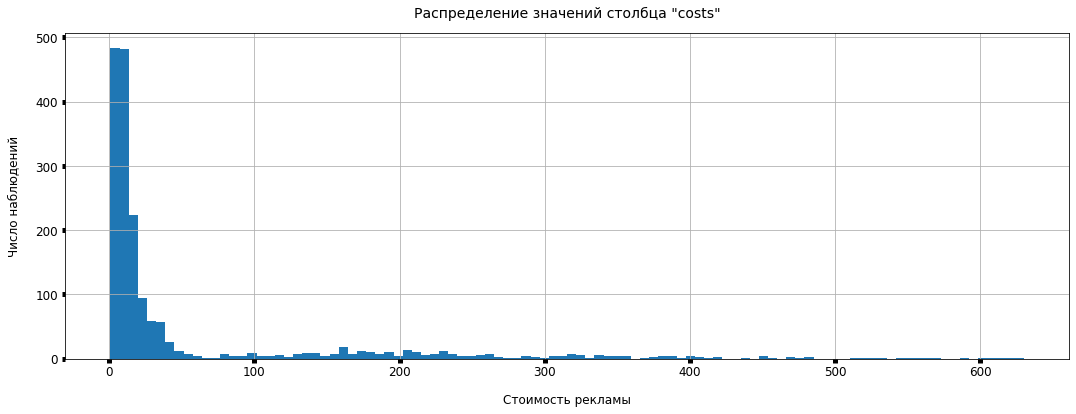

In [16]:
# посмотрим на распределение значений столбца costs в датасете costs

ax = costs['costs'].hist(bins=100, figsize=(18,6))
ax.set_title('Распределение значений столбца "costs"', fontsize=14, pad=15)
ax.set_xlabel('Стоимость рекламы', fontsize=12, labelpad=15)
ax.set_ylabel('Число наблюдений', fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, width=5)
plt.show()

Распределение значений столбца "costs" в датасете costs корректное.

In [17]:
# дополнительно проверим уникальные значения некоторых столбцов ручным способом

def get_unique_value(df):
    for column in df.columns:
        display(df[column].value_counts().reset_index())

print('Датасет "visits"')
get_unique_value(visits.drop(columns=['user_id', 'session_start', 'session_end']))

print('\nДатасет "orders"')
display(orders['revenue'].value_counts().reset_index())

print('\nДатасет "costs"')
costs['channel'].value_counts().reset_index()

Датасет "visits"


index  region
0  United States  207327
1             UK   36419
2         France   35396
3        Germany   30759

index  device
0   iPhone  112603
1  Android   72590
2       PC   62686
3      Mac   62022

index  channel
0              organic   107760
1               TipTop    54794
2             FaceBoom    49022
3       WahooNetBanner    20465
4              LeapBob    17013
5   OppleCreativeMedia    16794
6       RocketSuperAds    12724
7              YRabbit     9053
8         MediaTornado     8878
9           AdNonSense     6891
10      lambdaMediaAds     6507


Датасет "orders"


index  revenue
0   4.99    38631
1   5.99      780
2   9.99      385
3  49.99      212
4  19.99      204


Датасет "costs"


index  channel
0              TipTop      180
1      WahooNetBanner      180
2             YRabbit      180
3      RocketSuperAds      180
4      lambdaMediaAds      180
5             LeapBob      180
6          AdNonSense      180
7  OppleCreativeMedia      180
8        MediaTornado      180
9            FaceBoom      180

### Вывод

По результатам предобработки данных:

- **Объем датасетов**: количество строк не изменилось до и после предобработки данных.

- **Тип данных**: в столбцах с датой и временем тип данных изменен на `datetime`. Во всех иных столбцах тип данных корректный.

- **Пропуски** отсутствуют.

- **Дубликаты и аномалии** не обнаружены.

In [18]:
# вызываем функцию для вывода общей информации о датасете с посещениями после предобработки
print('Датасет с посещениями')
get_general_info(visits)
print('Количество строк до предобработки данных составляет:', len(visits_before))
print('Количество строк после предобработки данных составляет: ', len(visits))

# вызов функции для вывода общей информации о датасете с покупками после предобработки
print('\n------\nДатасет с покупками')
get_general_info(orders)
print('Количество строк до предобработки данных составляет:', len(orders_before))
print('Количество строк после предобработки данных составляет: ', len(orders))

# вызов функции для вывода общей информации о датасете с рекламными затратами после предобработки
print('\n------\nДатасет с затратами на рекламу')
get_general_info(costs)
print('Количество строк до предобработки данных составляет:', len(costs_before))
print('Количество строк после предобработки данных составляет: ', len(costs))


Датасет с посещениями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0        user_id  0
1         region  0
2         device  0
3        channel  0
4  session_start  0
5    session_end  0

Общее количество строк составляет 309901.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Количество строк до предобработки данных составляет: 309901
Количество строк после предобработки данных составляет:  309901

------
Датасет с покупками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0   user_id  0
1  event_dt  0
2   revenue  0

Общее количество строк составляет 40212.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Количество строк до предобработки данных составляет: 40212
Количество строк после предобработки данных составляет:  40212

------
Датасет с затратами на рекламу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

**************************************************
Количество пропусков во всем датасете составляет 0.
**************************************************
Таблица с пропусками в датасете:


index  0
0       dt  0
1  channel  0
2    costs  0

Общее количество строк составляет 1800.
**************************************************
Количество полностью совпадающих строк составляет 0.
**************************************************
Количество строк до предобработки данных составляет: 1800
Количество строк после предобработки данных составляет:  1800


## Функции для расчета и анализа LTV, ROI, удержания и конверсии.

Для дальнейшего исследования и анализа бизнес-показателей зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей

In [19]:
# создадим функции для вычисления значений метрик:

# 1. функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )


# для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для подсчёта Retention Rate

In [20]:
# 2. функция для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для посчета Conversion Rate

In [21]:
# 3. функция для посчета Conversion Rate


def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для подсчета LTV и ROI

In [22]:
# 4. функция для подсчета LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания фрейма

In [23]:
# 5. функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для построения графика Retention Rate

In [24]:
# 6. функция для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для построения графика конверсии

In [25]:
# 7. функция для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


### Функция для визуализации LTV и ROI

In [26]:
# 8. функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

В рамках исследовательского анализа данных:

- выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей;
- определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи;
- изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

### Профили пользователей. Минимальные и максимальные даты привлечения

Составим профили пользователей, а также определим минимальные и максимальные даты привлечения пользователей.
Профили пользователей понадобятся при расчете маркетинковых показателей. Даты привлечения пользователей помогут определить момент и горизонт анализа данных, что также будет необходимо для расчета маркетинговых показателей.

In [27]:
# составим профили пользователей 

profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

# подсчитаем минимальные и максимальные даты привлечения пользователей

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(f'\nМинимальная дата привлечения: {min_date}.\n'
      f'Максимальная дата привлечения: {max_date}.')

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23


Минимальная дата привлечения: 2019-05-01.
Максимальная дата привлечения: 2019-10-27.


**Вывод**

Для проведения исследования в нашем распоряжении профили пользователей с информацией о дате посещения сайта, устройства и страны пользователя. Также в профилях пользователей мы можем установить рекламный источник и стоимость привлечения.

Минимальная и максимальные даты соответствуют данным, предоставленных заказачиком.

### Страны пользователей

Теперь установим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Также определим долю платящих пользователей из каждой страны.

In [28]:
# создаем функцию для построения таблицы с распределением метрик среди платящих пользователей

def build_table(metric_name, dimension):
    country = profiles.groupby(metric_name).agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
    country.columns = ['Число пользователей', 'Число платящих', '% платящих']
    country['% платящих'] *= 100 
    country['% неплатящих'] = 100 - country['% платящих']
    country['% среди всех платящих'] =  (
                country['Число платящих'] * 100)  / country['Число платящих'].sum() 
    country.sort_values(by='% платящих', ascending=False)
    country = (
        country.sort_values(by='% платящих', ascending=False)
        .reset_index()
        .rename(columns={metric_name: dimension})
    )
    return country.set_index(dimension), \
           country[[dimension, 'Число платящих', '% среди всех платящих']] \
           .set_index(dimension).sort_values(by='% среди всех платящих', ascending=False)



# создаем функцию по построению графика для отражения распределения долей платящих пользователей среди всех пользователей 
# в зависимости от выбранной метрики

def build_stacked_bar(df, dimension, title):

    ax = df[['% платящих', '% неплатящих']].sort_values(by='% платящих').plot.barh(stacked=True, 
                                     color={"% платящих": "sandybrown", "% неплатящих":"powderblue"},
                                     figsize =(18,8))

    for p in ax.patches:
        ax.annotate(str(round(float(p.get_width()), 1)) + "%", \
                    (p.get_x() - 0 + p.get_width(), p.get_y() + 0.2), size=14)

    ax.set_title(label=title,
             fontsize=16, pad=15)
    ax.legend(loc='lower right', bbox_to_anchor=(0.9,0), fontsize=14)

    ax.set_xlabel('Число пользователей, в процентах', fontsize=14, labelpad=15) 
    ax.set_ylabel(dimension, fontsize=14, labelpad=15)
    plt.tick_params(labelsize=14, width=3)

    plt.show()
    
    
# создаем функцию по построению графика для отражения распределения всех платящих пользователей в соответствии с метрикой  

def build_pie_chart(df, dimension, colors, title):
    country = ['lightskyblue', 'plum', 'peachpuff', 'palevioletred']
    device = ['palegoldenrod', 'pink', 'mediumaquamarine', 'darkkhaki']
    df = df.reset_index()
    def autopct_format (percent):
        total = df['Число платящих'].sum()
        return '{:.0f}% ({:.0f})'.format(percent, total * percent / 100)

    fig, ax = plt.subplots(figsize =(18,12))

    wedges, labels, autopct = plt.pie(
        x=df['Число платящих'], labels=df[dimension], autopct=autopct_format,
        colors=country, textprops={'fontsize':14},
        startangle=90, pctdistance=0.6)
 
    for lab in labels:
        lab.set_fontsize(14)

    plt.axis('equal') 
    ax.set_title(label=title, fontsize=14, pad=15)

    fig.show()

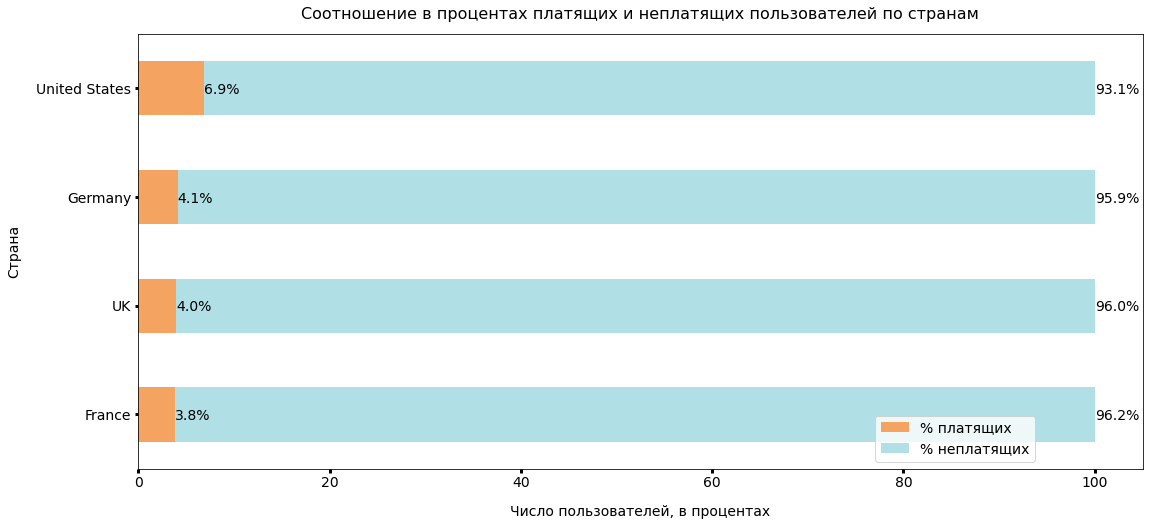

In [29]:
# вызываем функцию по построению таблицы по анализируемой метрике
# вызываем функцию по построению графика распределения пользователей 

country, payers_by_country = build_table('region', 'Страна')
display(country[['Число пользователей', 'Число платящих', '% платящих']].style.format('{:.1f}'))
build_stacked_bar(country, 'Страна', 'Соотношение в процентах платящих и неплатящих пользователей по странам')

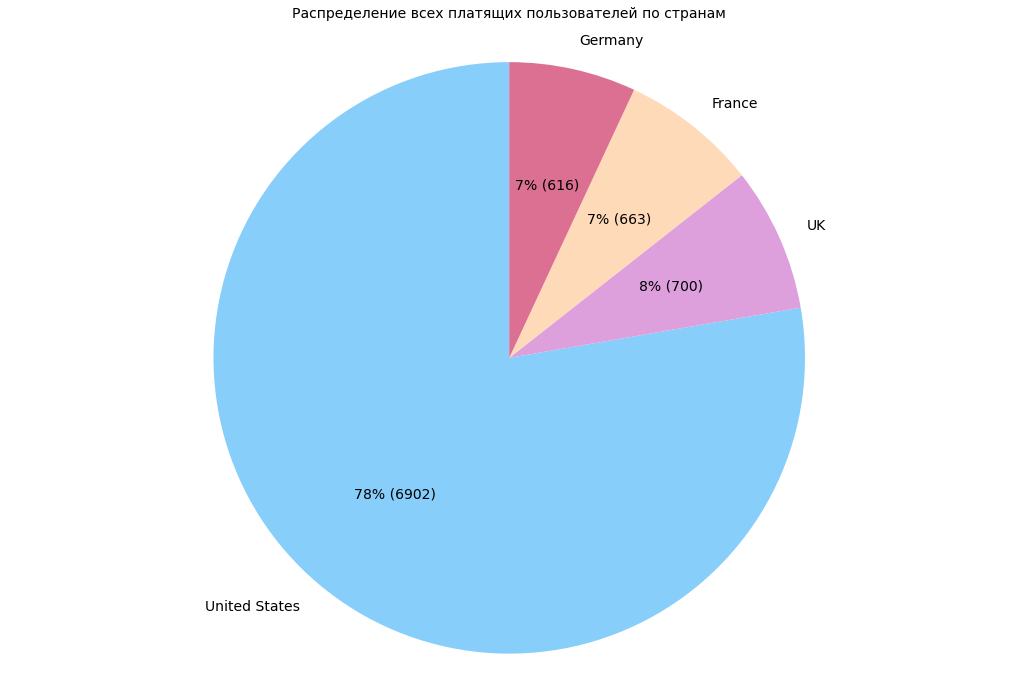

In [30]:
# выводим на экран таблицу распределения долей среди платящих пользователей
# вызываем функцию для построения графика распределения платящих пользователей

display(payers_by_country.style.format('{:.1f}'))
build_pie_chart(payers_by_country, 'Страна', country, 'Распределение всех платящих пользователей по странам')

**Вывод**

Сайт посещают пользователи из четырех стран:
- Великобритания, 
- США,
- Германия,
- Франция.

Подавляющее число пользователей из США. Меньше всего из Франции.


По количеству платящих пользователей лидер также США (78% от всех платящих).


Доля платящих пользователей также выше среди пользователей США - 6.9%. В остальных странах доля платящих примерно одинаковая - в пределах 3.8-4.1 %%.

Таким образом, явный лидер среди пользовательских стран - США. Самые низкие показатели - Франция.

### Тип устройств

Теперь узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи, а также определим долю платящих для каждого устройства.

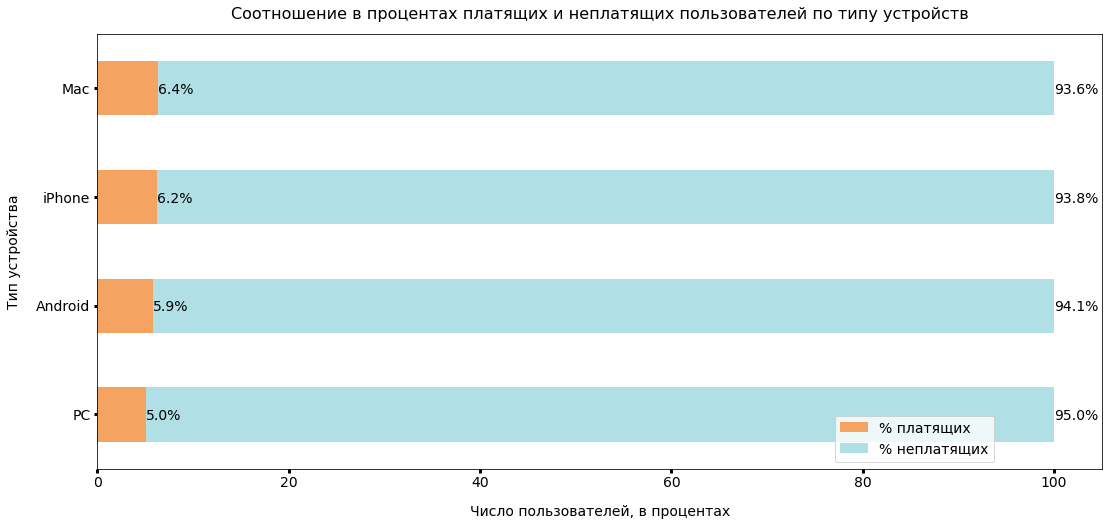

In [31]:
# вызываем функцию по построению таблицы по анализируемой метрике
# вызываем функцию по построению графика распределения пользователей 

device, payers_by_device = build_table('device', 'Тип устройства')
display(device[['Число пользователей', 'Число платящих', '% платящих']].style.format('{:.1f}'))
build_stacked_bar(device, 'Тип устройства', 'Соотношение в процентах платящих и неплатящих пользователей по типу устройств')

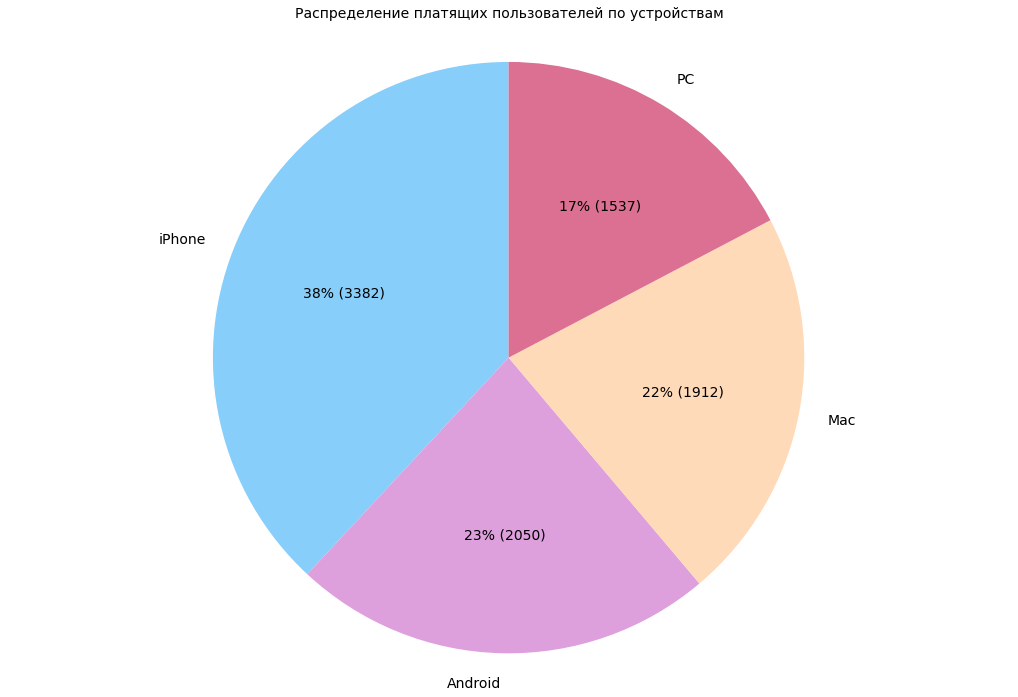

In [32]:
# выводим на экран таблицу распределения долей среди платящих пользователей
# вызываем функцию для построения графика распределения платящих пользователей

display(payers_by_device.sort_values(by='% среди всех платящих', ascending=False).style.format('{:.1f}'))
build_pie_chart(payers_by_device, 'Тип устройства', device, 'Распределение платящих пользователей по устройствам')

**Вывод**

Пользователи используют 4 типа устройств: 
- iPhone, 
- устройства с ОС Android, 
- PC,
- устройства с ОС Mac.


По числу пользователей в лидерах iPhone, также среди пользователей iPhone больше всего платящих (38% от всех платящих).


Доли платящих пользователей варьируются в пределах 5.0-6.4%%.
Выше у клиентов с ОС Mac - 6.4% и у iPhone - 6.2%. 

### Рекламные источники

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей, а также выделим долю платящих для каждого канала привлечения.

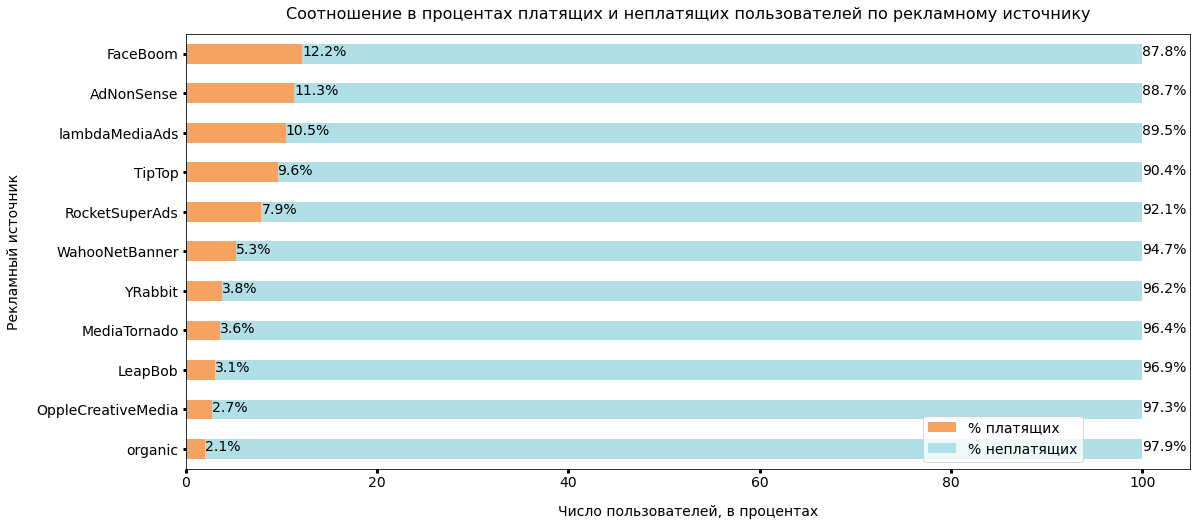

In [33]:
# вызываем функцию по построению таблицы по анализируемой метрике
# вызываем функцию по построению графика распределения пользователей 

channel, payers_by_channel = build_table('channel', 'Рекламный источник')
display(channel[['Число пользователей', 'Число платящих', '% платящих']].style.format('{:.1f}'))
build_stacked_bar(channel, 'Рекламный источник', \
                  'Соотношение в процентах платящих и неплатящих пользователей по рекламному источнику')

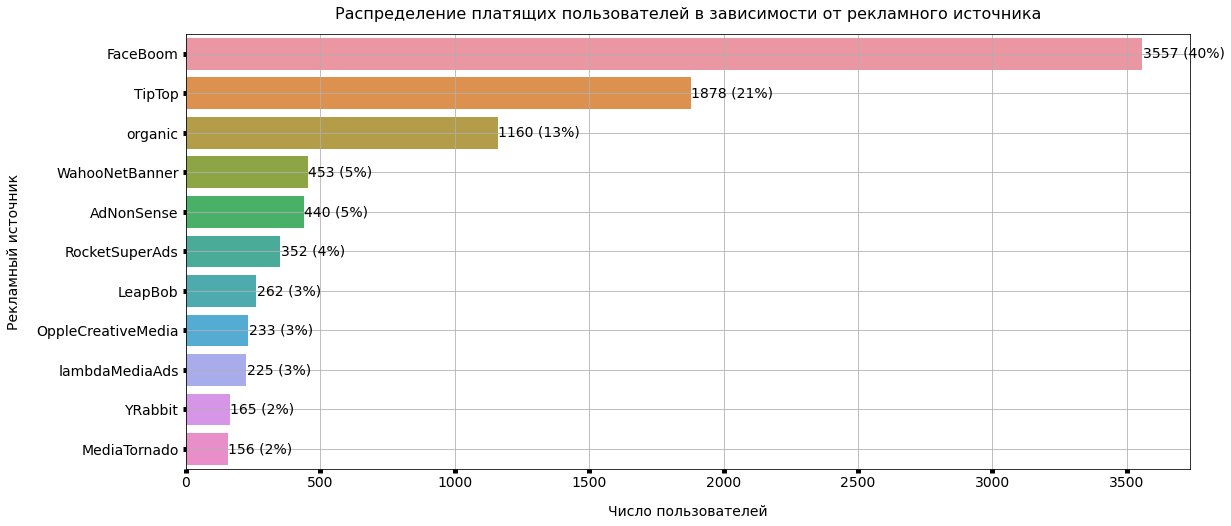

In [34]:
# выводим на экран таблицу распределения долей среди платящих пользователей
# строим столбчатый график распределения платящих пользователей по рекламному источнику

display(payers_by_channel.style.format('{:.1f}'))

channel_for_chart = channel.reset_index().sort_values(by='Число платящих', ascending=False)

def autopct_format(value):
    total = channel_for_chart['Число платящих'].sum()
    return '{} ({}%)'.format(value, round(value / total * 100))

# строим столбчатый график
fig, ax = plt.subplots(figsize =(18,8))

ax = sns.barplot(data=channel_for_chart, x='Число платящих', y='Рекламный источник')
                          
for p in ax.patches:
    ax.annotate(autopct_format(int(p.get_width())), (p.get_x() + 1.5 \
                                                                        + p.get_width(), p.get_y() + 0.5), size=14)

ax.set_title(label='Распределение платящих пользователей в зависимости от рекламного источника', fontsize=16, pad=15)

ax.set_ylabel('Рекламный источник', fontsize=14, labelpad=15)
ax.set_xlabel('Число пользователей', fontsize=14, labelpad=15)
plt.grid()
plt.tick_params(labelsize=14, width=5)

fig.show()

**Вывод**

У приложения 10 платных рекламных источников, также некоторые пользователи приходят бесплатно.
Больше всего пользователей пришло самостоятельно, через FaceBoom и TipTop.

По количеству платящих пользователей больше всего платящих у FaceBoom - 40% от всех платящих. Меньше всего платящих пользователй пришло через рекламный канал MediaTornado - только 2%.

Доля платящих пользователей от всех привлеченных выше всего также у FaceBoom - 12,2%. Ниже всего доля платящих пользователей среди тех, кто пришел бесплатно - 2,1%.

### Вывод

Пользователи приходят на сайт из 4 стран, используя одно из 4 типов устройств и через 10 платных рекламных источников либо бесплатно.

С точки зрения количества пользователей больше всего пользователей:
- из США (100 002 пользователей).
- используют iPhone (54 479 пользователей).
- пришло без рекламы (56 439 пользователей), через рекламу FaceBoom (29 144 пользователей), через TipTop (19 561 пользователей).


C точки зрения количества платящих пользователей, большинство платящих пользователей:
- из США (78%).
- используют iPhone (38%).
- пришло через рекламу FaceBoom (40%) и TipTop(21%). 

С точки зрения доли платящих пользователей, выше всех доля платящих среди пользователей:
- из США (6,9%).
- с ОС Mac (6,4%). Практически такая же доля платящих среди пользователей iPhone (6,2%).
- пришло через рекламу FaceBoom (12,2%). Большая доля платящих пользователей также у рекламы AdNonSense (11,3%) и lambdaMediaAds(10,5%).

## Маркетинг

### Распределение трат по рекламным источникам. Общая сумму расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг. Также выясним как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Так как нам неизвестна валюта, в которой производились траты и покупки, мы не будем ее указывать. 

Общие расходы на рекламу составили: 105497


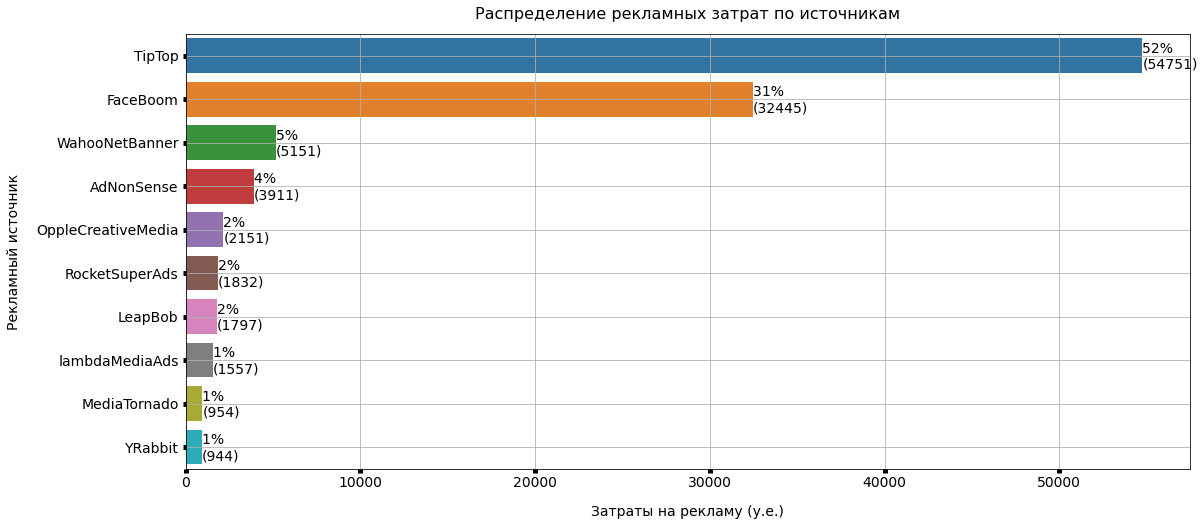

In [35]:
# рассчитываем общую сумму расходов на маркетинг
# группируем данные для построения графика о распределении затрат по источникам

print('Общие расходы на рекламу составили:', round(costs['costs'].sum()))
cost_by_channel = costs.groupby('channel').agg({'costs':'sum'}).reset_index().sort_values(by='costs', ascending=False)
cost_by_channel['Процент затрат от всех'] = ((cost_by_channel['costs'] / cost_by_channel['costs'].sum()) * 100).round(1)
cost_by_channel = cost_by_channel.rename(columns={'channel':'Рекламный источник', 'costs':'Всего затрат'})


# построим столбчатый график, где отразим распределение трат по рекламным источникам

#создаем функцию для вывода в подписи значений графика процентов и суммы трат
def percent(value):
    total = cost_by_channel['Всего затрат'].sum()
    return '{:.0f}% \n({})'.format(value / total * 100, value)

fig, ax = plt.subplots(figsize =(18,8))

ax = sns.barplot(data=cost_by_channel, x='Всего затрат', y='Рекламный источник')
                          
for p in ax.patches:
    ax.annotate(percent(int(p.get_width())), (p.get_x() + 2.5 + p.get_width(), p.get_y() + 0.7), size=14)

ax.set_title(label='Распределение рекламных затрат по источникам', fontsize=16, pad=15)

ax.set_ylabel('Рекламный источник', fontsize=14, labelpad=15)
ax.set_xlabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
plt.grid()
plt.tick_params(labelsize=14, width=5)

fig.show()

**Вывод**

Как видим, общая сумма расходов составила 105 497 денежных единиц.

При этом расходы на рекламный канал TipTop составляют более половины от всех затрат на рекламу (52%). В свою очередь на рекламу через FaceBoom затраты только 31%.

Стоит обратить на это внимание, так как на TipTop очень высокие траты, а доля платящих от всех пользователей только 9.6, что не является лидирующим показателем.

### Динамика изменения рекламных затрат по каждому источнику

Посмотрим динамику изменения расходов во времени по каждому источнику.
Для начала построим график изменения всех рекламных трат во времени, затем по каждому источнику.
После визуализируем  динамику изменения расходов во времени по месяцам, а также по неделям по каждому источнику.

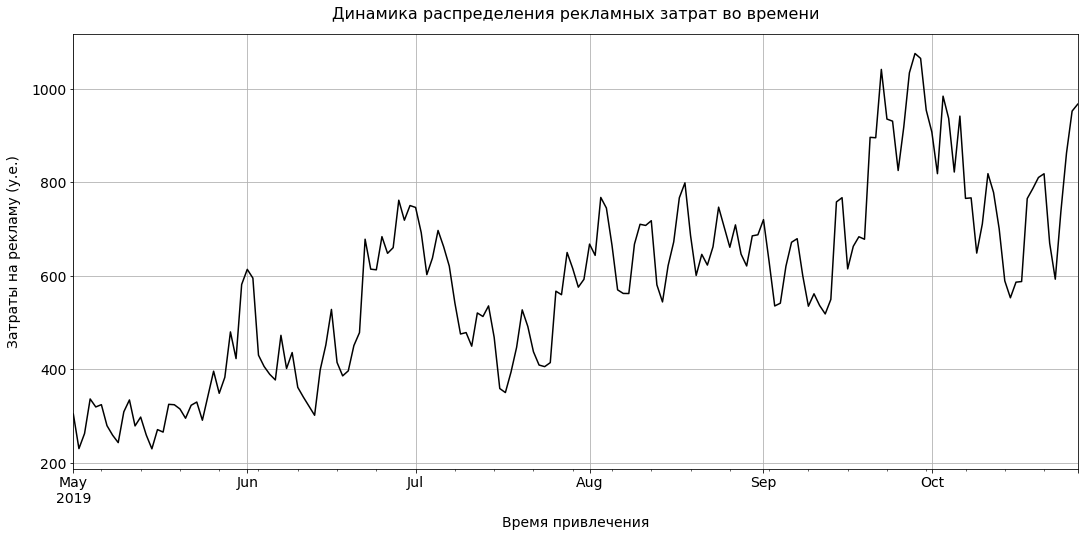

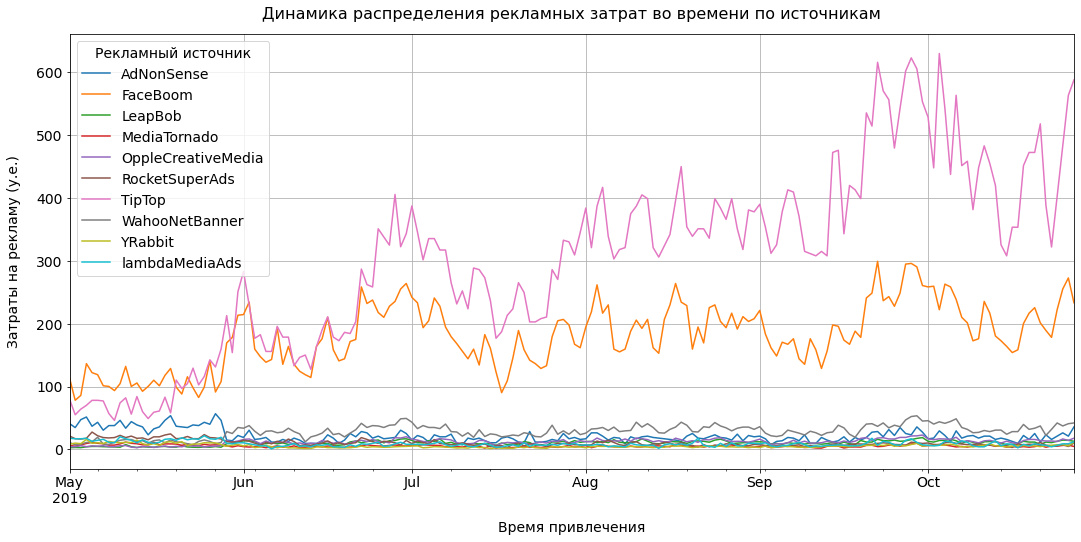

In [36]:
# подготовим таблицу с данными по рекламным затратам, где выделим недели и месяца 

history_costs = costs.copy()
history_costs['dt'] = pd.to_datetime(history_costs['dt'])
history_costs['week'] = history_costs['dt'].dt.isocalendar().week
history_costs['month'] = history_costs['dt'].astype('datetime64[M]').dt.date


# строим график динамики рекламных затрат в целом
ax = history_costs.groupby('dt') \
    .agg({'costs': 'sum'}) \
    .plot(grid=True, color = 'black', figsize=(18,8), legend=False)
   
ax.set_title(label='Динамика распределения рекламных затрат во времени', fontsize=16, pad=15)
ax.set_ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=10)
ax.set_xlabel('Время привлечения', fontsize=14, labelpad=10)
plt.tick_params(labelsize=14)
plt.show()



# строим график динамики рекламных затрат во времени по источникам
ax = history_costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum') \
             .plot (grid=True,  figsize=(18,8))
    
ax.set_title(label='Динамика распределения рекламных затрат во времени по источникам', fontsize=16, pad=15)
ax.set_ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
ax.set_xlabel('Время привлечения', fontsize=14, labelpad=15)
ax.legend(loc='upper left', fontsize=14, 
          title='Рекламный источник', title_fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

Теперь построим график динамики расходов на рекламу по неделям и по месяцам.

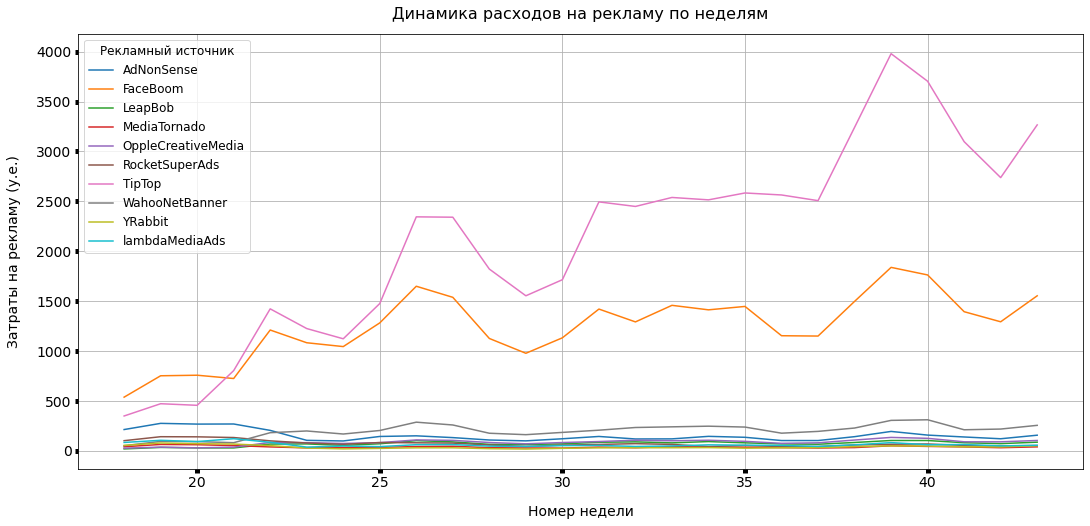

In [37]:
# визуализация изменений рекламных трат во времени (неделя)

ax = history_costs.pivot_table(
    index='week', columns='channel', 
    values='costs',  aggfunc='sum'
).plot(figsize=(18, 8), grid=True)

ax.set_title(label='Динамика расходов на рекламу по неделям',
             fontsize=16, pad=15)
ax.legend(loc='upper left', fontsize=12, 
          title='Рекламный источник', title_fontsize=12)
ax.set_xlabel('Номер недели', fontsize=14, labelpad=15) 
ax.set_ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
plt.tick_params(labelsize=14, width=5)
plt.show()

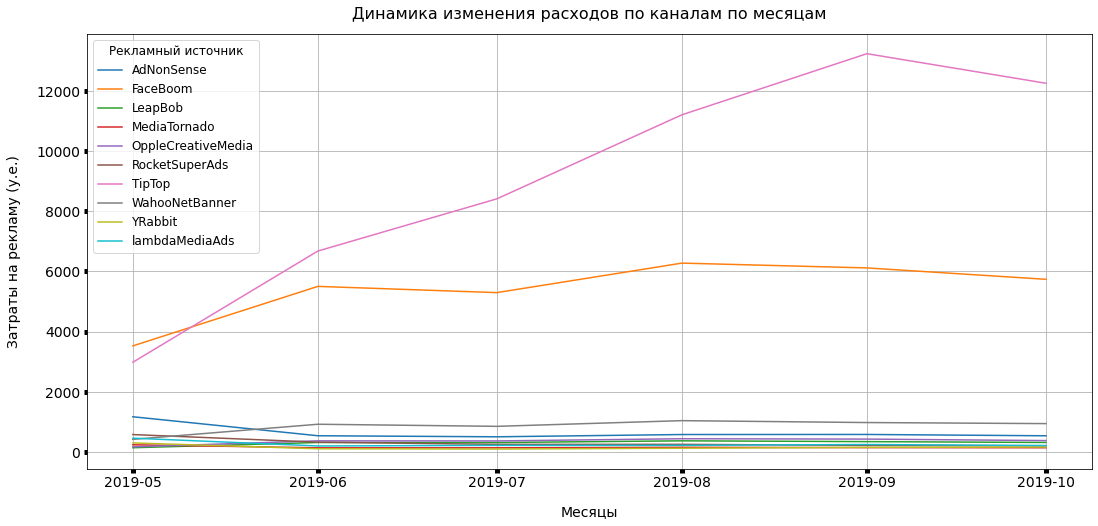

In [38]:
# визуализация изменений рекламных трат во времени (месяц)

ax = history_costs.pivot_table(
    index='month', columns='channel',
    values='costs',aggfunc='sum' 
).plot(figsize=(18, 8), grid=True)

ax.set_title(label='Динамика изменения расходов по каналам по месяцам',
             fontsize=16, pad=15)
ax.legend(loc='upper left', fontsize=12, 
          title='Рекламный источник', title_fontsize=12)
plt.xlabel('Месяцы', fontsize=14, labelpad=15)
plt.ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
plt.tick_params(labelsize=14, width=5)
plt.show()

### Динамика изменения рекламных затрат нелидирующих источников

Из проанализированных данных видим, что среди рекламных источников есть два явных лидера - TipTop и Faceboom. Ввиду того, что их показатели сильно выше остальных, для более детального расмотрения динамики затрат по другим каналам исключим лидеров из данных для графиков ниже.

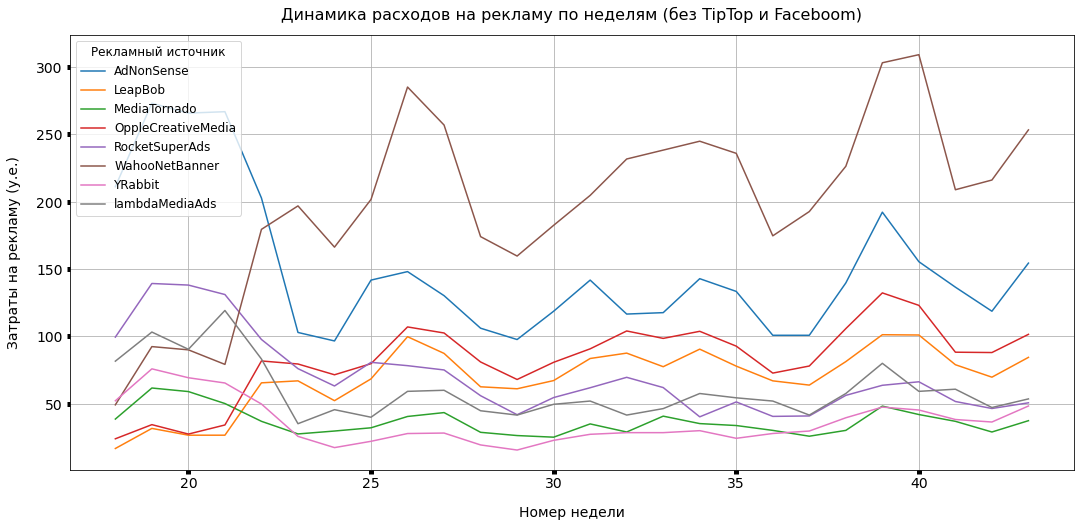

In [39]:
# визуализация изменений рекламных трат без TipTop и Faceboom во времени (неделя)

ax = history_costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(
    index='week', columns='channel', 
    values='costs',  aggfunc='sum'
).plot(figsize=(18, 8), grid=True)

ax.set_title(label='Динамика расходов на рекламу по неделям (без TipTop и Faceboom)',
             fontsize=16, pad=15)
ax.legend(loc='upper left', fontsize=12, 
          title='Рекламный источник', title_fontsize=12)
ax.set_xlabel('Номер недели', fontsize=14, labelpad=15) 
ax.set_ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
plt.tick_params(labelsize=14, width=5)
plt.show()

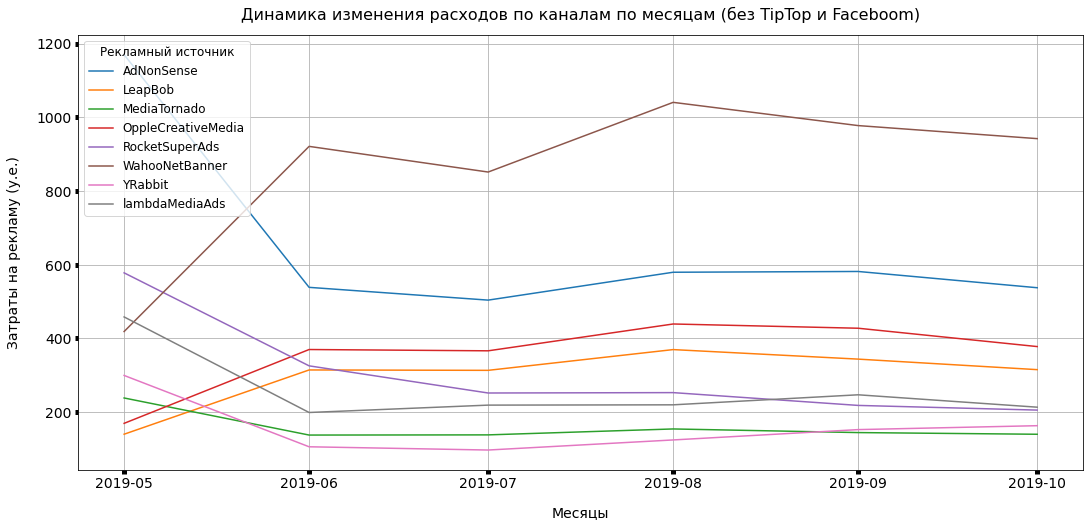

In [40]:
# визуализация изменений рекламных трат без TipTop и Faceboom во времени (месяц)

ax = history_costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(
    index='month', columns='channel',
    values='costs',aggfunc='sum' 
).plot(figsize=(18, 8), grid=True)

ax.set_title(label='Динамика изменения расходов по каналам по месяцам (без TipTop и Faceboom)',
             fontsize=16, pad=15)
ax.legend(loc='upper left', fontsize=12, 
          title='Рекламный источник', title_fontsize=12)
plt.xlabel('Месяцы', fontsize=14, labelpad=15)
plt.ylabel('Затраты на рекламу (у.е.)', fontsize=14, labelpad=15)
plt.tick_params(labelsize=14, width=5)
plt.show()

**Вывод**

Из проанализированных данных видим, что затраты на рекламу в целом (без деления на каналы) скачкообразно росли. 
Из графиков по каналам также видим, что скачки затрат происходили по двум каналам - TipTop и Faceboom. 

Рассматривая динамику расходов по месяцам по каналам также заметно, что  затраты на рекламу из этих двух источников возросли в несколько раз.
За весь анализируемый период, расходы на канал TipTop - выросли более в 3 раза, на FaceBoom - в два раза. Расходы на другие каналы практически не изменились.

При этом, в сентябре затраты на TipTop были более чем в два раза выше, чем на FaceBoom. 

### Cтоимость привлечения одного пользователя (САС)

Далее рассмотрим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого будем использовать профили пользователей.

In [41]:
# подсчет CAC по источникам привлечения

cac_mean = (profiles
            .pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc='mean')
            .reset_index()
            .rename(columns={'acquisition_cost': 'CAC', 'channel': 'Рекламный источник'})
       .sort_values(by='CAC', ascending=False)
    )


print('Средняя стоимость привлечения клиента составляет', \
      round(profiles[profiles.channel != "organic"].acquisition_cost.mean(),2))
cac_mean

Средняя стоимость привлечения клиента составляет 1.13


Рекламный источник  CAC
6               TipTop 2.80
1             FaceBoom 1.11
0           AdNonSense 1.01
9       lambdaMediaAds 0.72
7       WahooNetBanner 0.60
5       RocketSuperAds 0.41
4   OppleCreativeMedia 0.25
8              YRabbit 0.22
3         MediaTornado 0.22
2              LeapBob 0.21
10             organic 0.00

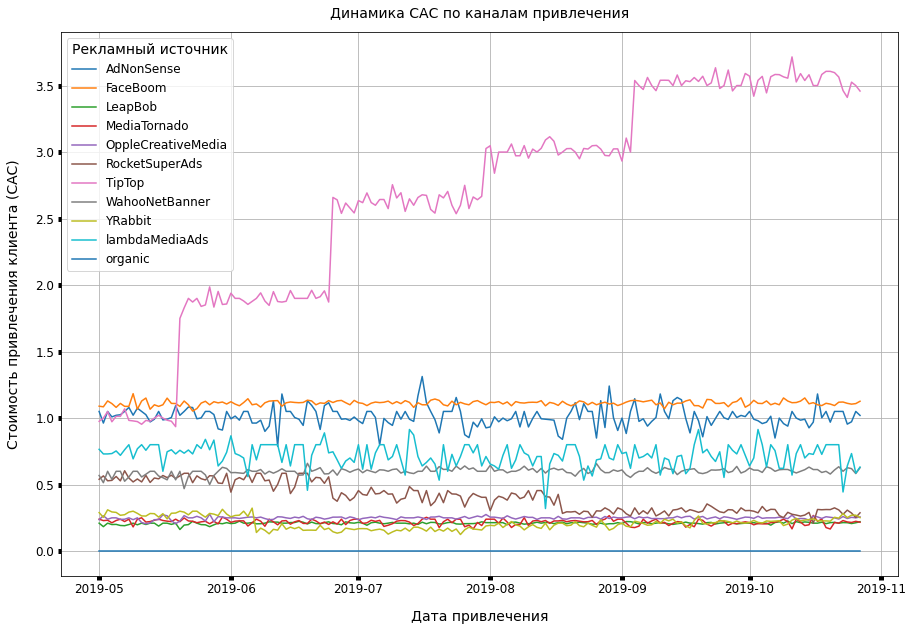

In [42]:
# визуализация динамики изменений CAC по источникам привлечения

ax = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(figsize=(15, 10), grid=True)

ax.set_title(label='Динамика САС по каналам привлечения',
             fontsize=14, pad=14)
ax.legend(loc='upper left', fontsize=12, 
          title='Рекламный источник', title_fontsize=14)
ax.set_xlabel('Дата привлечения', fontsize=14, labelpad=14) 
ax.set_ylabel('Стоимость привлечения клиента (CAC)', fontsize=14, labelpad=14)
plt.tick_params(labelsize=12, width=5)

**Вывод**


Дороже всего стоимость привлечения клиентов через TipTop. На втором месте по стоимости привлечения FaceBoom, однако CAC у клиентов из FaceBoom чуть больше единицы, в то время как СAC через TipTop - 2,8. 

Как видим, в динамике стоимость привлечения одного клиента возросла только у клиентов, привлеченных из TipTop. Более того, эта стоимость возросла в 3.5 раза. В то время как стоимость привлечения из остальных каналов, включая FaceBoom, значительно не изменилась.

### Вывод

Всего заказчик использует 10 рекламных источников для привлечения клиентов.
Общая сумма расходов на рекламу за анализируемый период составила 105 497 денежных единиц. Среди рекламных источников есть два явных лидера: TipTop и Faceboom. 


Расходы на рекламный канал TipTop составляют более половины от всех затрат на рекламу (52%). На рекламу через FaceBoom - 31%.

Хотя на рекламный источник TipTop очень высокие траты, доля платящих от всех пользователей из этого канала -  только 9.6. В то время как у FaceBoom доля платящих 12,2 и это самый высокий показатель.

За анализируемый период затраты на рекламу в целом скачкообразно росли. Скачки затрат происходили на рекламу через два лидирующих источника. Расходы на канал TipTop выросли в 3 раза, на FaceBoom - в 2 раза. Расходы на другие каналы практически не изменились.

Дороже всего и с большим отрывом стоимость привлечения клиентов через TipTop. На втором месте по стоимости привлечения FaceBoom.

В динамике САС возросла у клиентов, привлеченных из TipTop, рост в 3.5 раза. В то время как стоимость привлечения из остальных каналов, включая FaceBoom, практически не изменилась.

Соответственно, самым дорогостоящим рекламным источником является TipTop. Затраты на рекламу через данный источник росли практически ежемесячно. 

Далее проверим, окупается ли рост стоимости на рекламу прибылью, которую приносит платящий клиент из этого источника.

## Окупаемость рекламы

Проанализируем окупаемость рекламы, используя графики LTV, ROI и CAC. 

Будем оценивать окупаемость на 01.11.2019, с учетом того, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Подготовим данные для анализа окупаемости рекламы: установим момент и горизонт анализа. Для удобства также ограничим профили пользователей - оставим только те, которые были привлечены за счет рекламы.

In [43]:
# установим момент и горизонт анализа данных

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

# определим максимально возможную дату привлечения с учетом горизонта

max_analysis_date= observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

# ограничим профили пользователей

profiles_payers = profiles.query('channel != "organic"')

### LTV, CAC и ROI

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

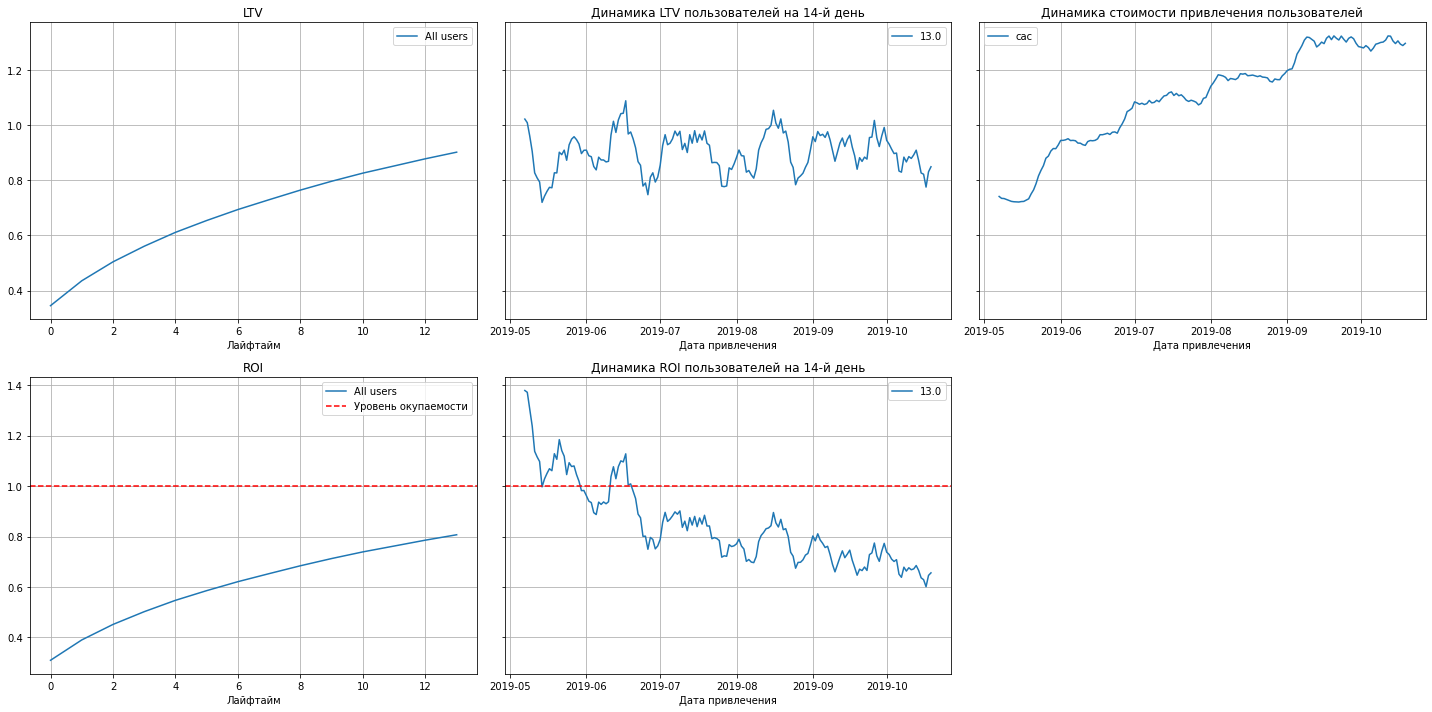

In [44]:
# построим графики LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_payers,
    orders,
    observation_date,
    horizon_days,
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Вывод**

Из полученных результатов видим следующее:

- LTV достаточно стабилен, показывает что за лайфтайм клиент приносит прибыль заказчку. Показатели LTV к 14 дню около 0,8-1,0. При этом, мы не видим значительного роста LTV в анализируемом периоде.
- CAC весь период растет. Соответственно, рекламный бюджет возрастает.
- ROI к концу лайфтама (14 дней) — чуть выше 80%. То есть реклама даже не окупается.
- ROI ниже уровня окупаемости уже с конца июня и продолжает падать.

Предварительно видим, что стоимость рекламы выросла, а траты пользователей не изменились.

Для поиска причин и более детального анализа необходимо будет провести анализ по всем доступным характеристикам пользователей — стране, рекламному источнику и устройству первого посещения.

### Convertion rate (CR), Retention rate (RR) и динамики их изменений

Теперь рассмотрим конверсию и удержание пользователей, а также динамику их изменений.

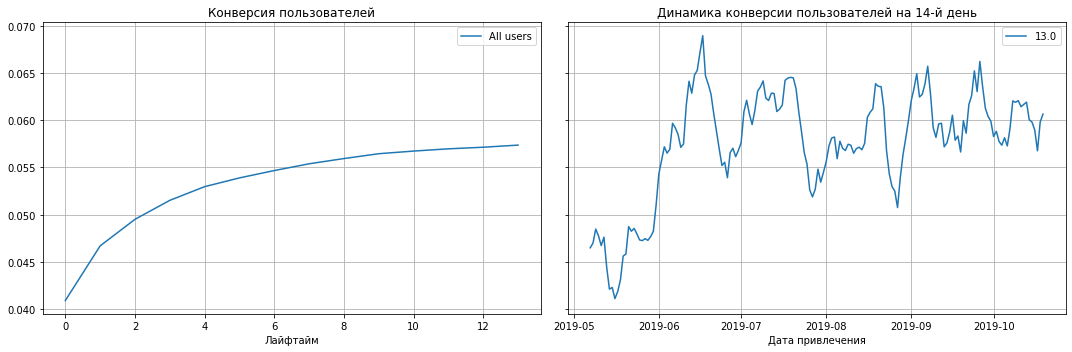

In [45]:
# смотрим конверсию пользователей, а также динамику конверсии

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

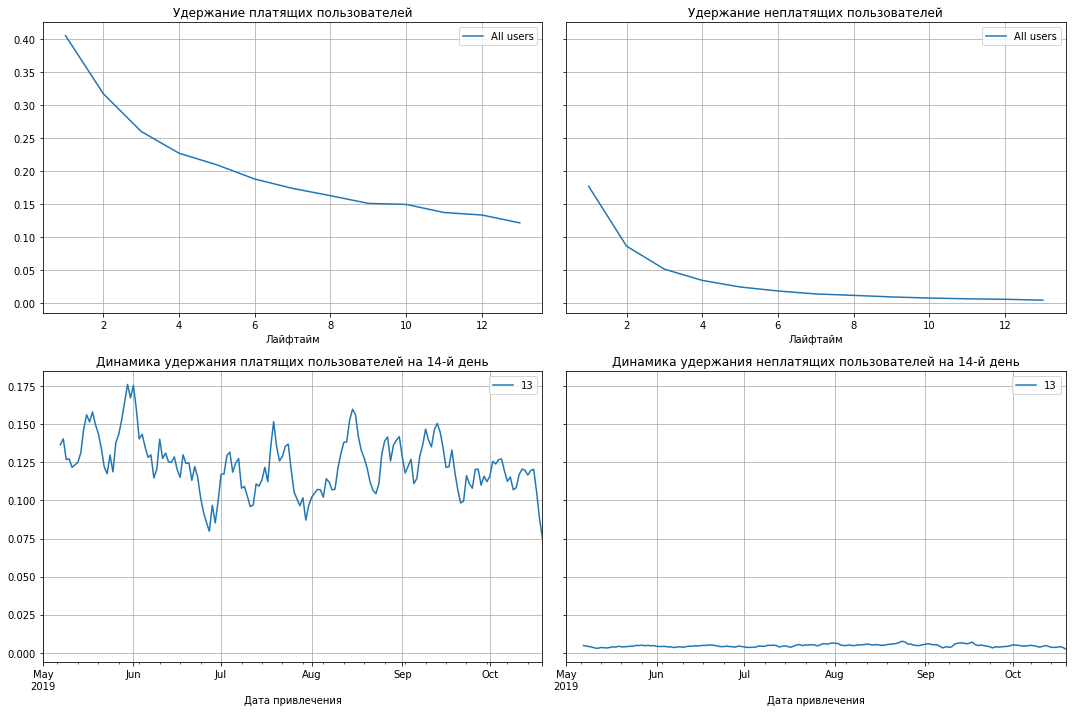

In [46]:
# смотрим удержание платящих и неплатящих пользователей, а также динамику удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

- Конверсия пользователей 

Как видим, конверсия пользователей на 14 день возросла в июне, после немного снизилась но стабильно держалась в пределах 0.50-0.65.


- Удержание пользователей


Удержание платящих пользователей к 14 дню составляет только около 12%. 
В динамике коэффициент удержания платящих пользователей на 14 день с конца августа стал снижаться. 
Динамика коэффициента удержания неплатящих пользователей на 14 день весь анализируемый период близка к нулю и не имеет значительных колебаний, что в целом не является аномалией для такой категории клиентов, но может быть направлением для увеличения прибыли.

### Окупаемость рекламы, CR и RR с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

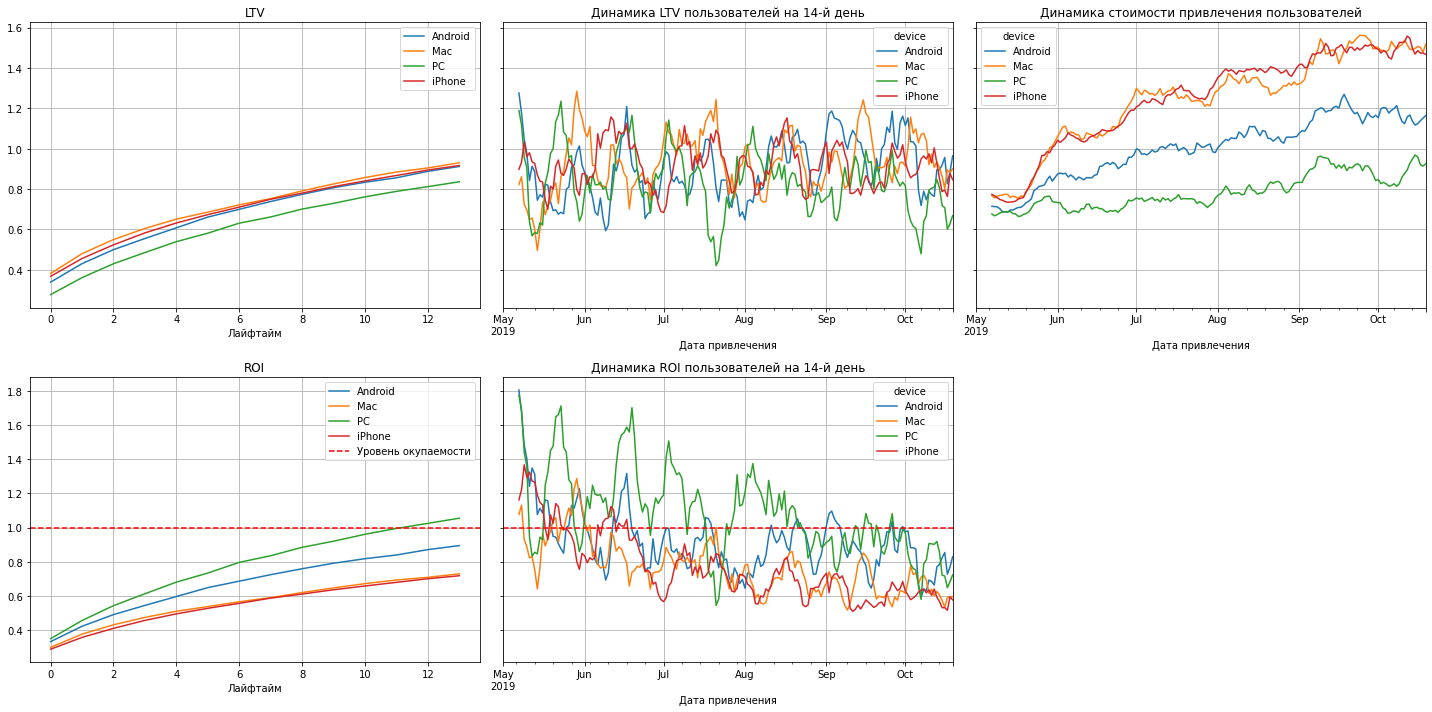

In [47]:
# смотрим окупаемость с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payers, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

**Вывод**

LTV у пользователей всех устройств стабильный и примерно одинаковый - и к 14 дню варьируется в пределах 0.8-0.1. При этом ниже всех LTV у пользователей PC.

К 14 дню окупаются только пользователи PC. 

Стоиомсть привлечения пользователей со всеми типами устройств растет. Больше остальных растет привлечение пользователей Mac и iPhone. В целом привлечения пользователей PC ниже всех, дороже остальных стоит привлечение пользователей Mac и iPhone.

При этом, не смотря на увеличение инвестиций в маркетинг, динамика ROI с августа снижается у всех устройств.

#### Конверсия и удержание по устройствам

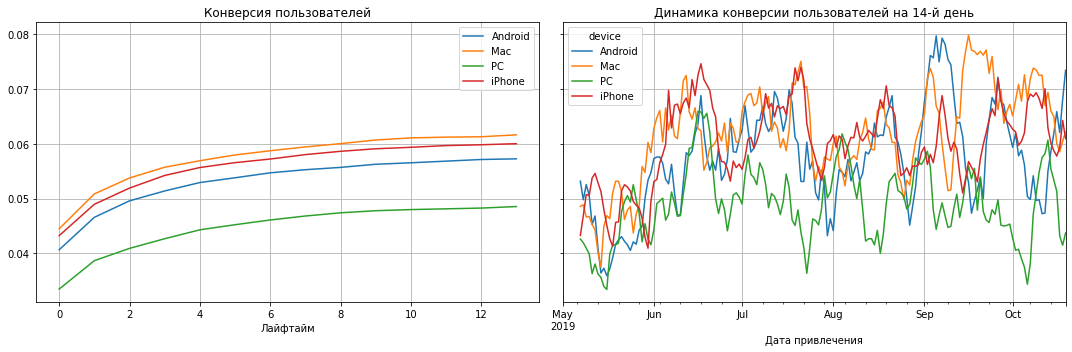

In [48]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


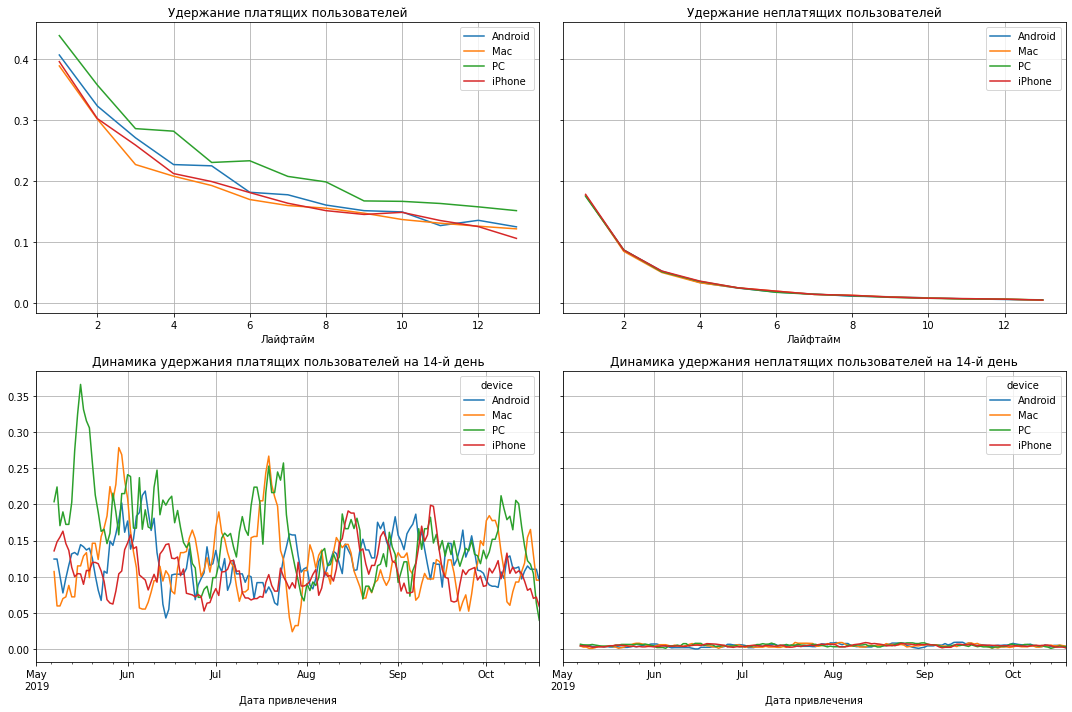

In [49]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

- Конверсия пользователей по устройствам

Как видим, немного выше остальных конверсии пользователей Mac и iPhone. Ниже остальных конверсия пользователей PC. 

- Удержание пользователей по устройствам

Лучшее удержание среди платящих пользователей у PC, худшие показатели у пользователей Mac и iPhone.
Динамика удержания среди платящих пользователей в мае сильно выросла у пользователей PC, однако после июня среди категорий трудно выделить явного лидера или сильно отстающих. 

### Окупаемость рекламы, CR и RR с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики.

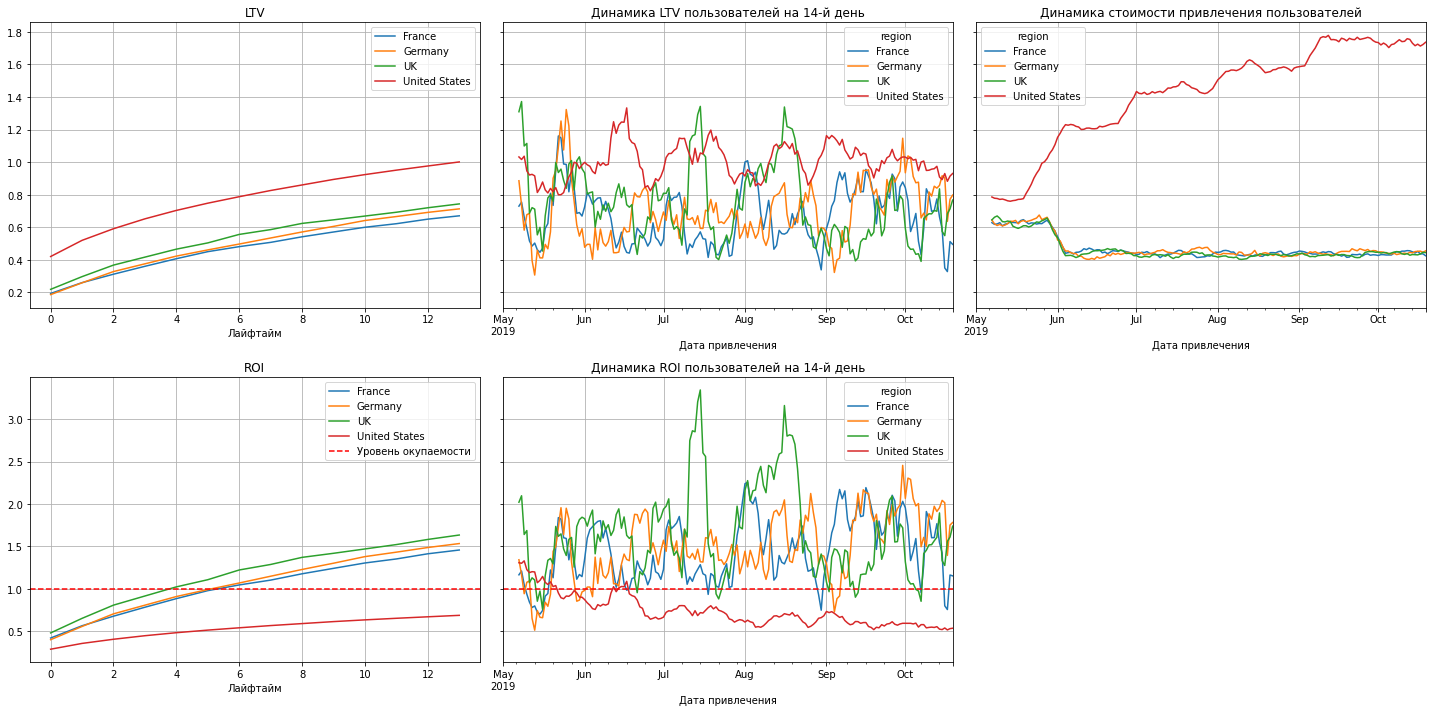

In [50]:
# смотрим окупаемость с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payers, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

**Вывод**

Из анализа по странам особое внимание следует обратить на пользователей из США.
Не смотря на то, что LTV данных пользователей выше остальных, стоимость их привлечения сильно увеличилась за исследуемый период, в то время как из остальных стран - стоимость уменьшилась.
Как итог, только пользователи из США не окупаются и их ROI в динамике падает.

#### Конверсия и удержание по странам

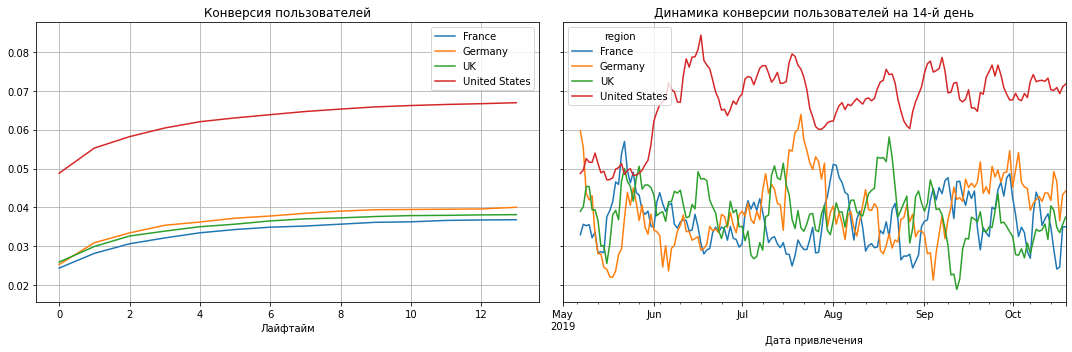

In [51]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

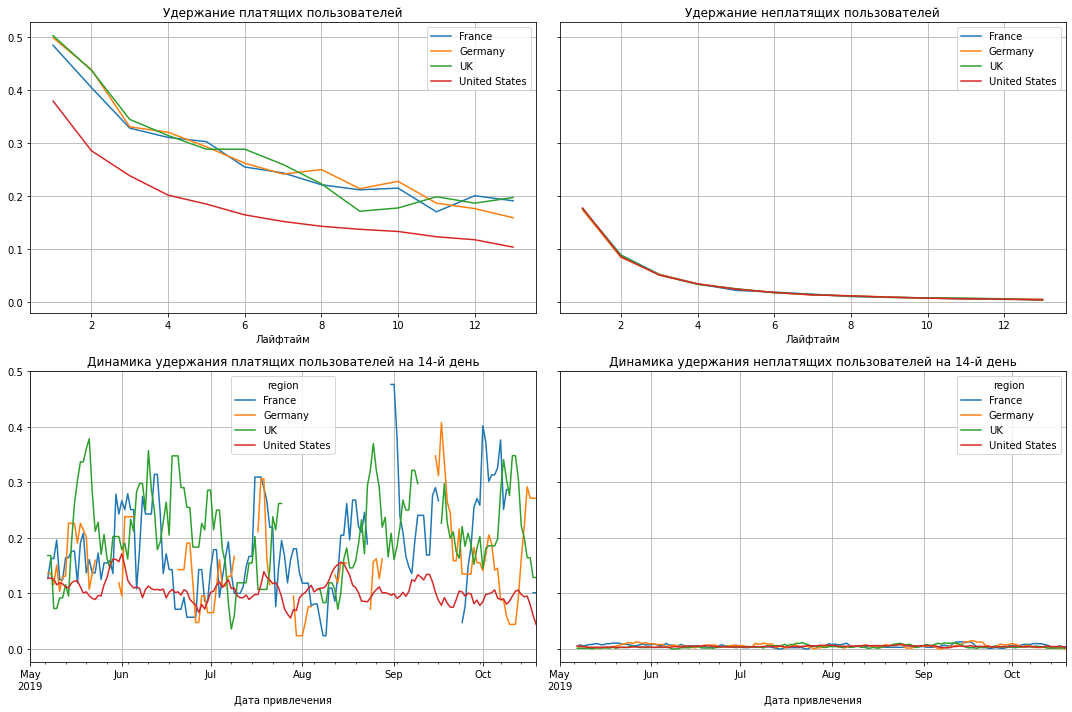

In [52]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

- Конверсия пользователей по странам

Выше всех конверсия пользователей из США - к 14 дню более 6%. Конверсия остальных стран на 14 дней около 3-4%%. 

- Удержание пользователей по странам

Среди всех стран, платящие пользователи из США удерживаются хуже остальных. 

### Окупаемость рекламы, CR и RR с разбивкой по рекламным источникам

Проанализируем окупаемость рекламы с разбивкой по рекламным источникам. Построим графики LTV и ROI, графики динамики LTV, CAC и ROI.

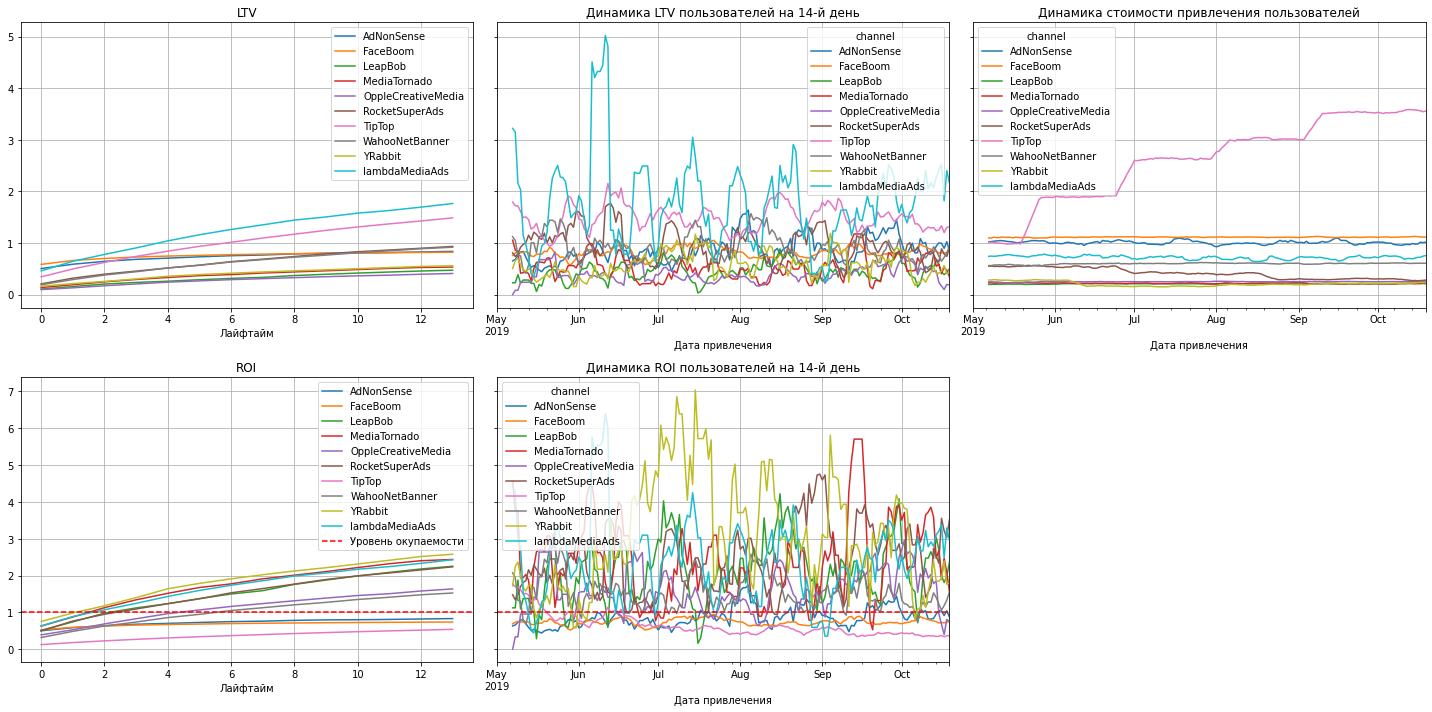

In [53]:
# смотрим окупаемость с разбивкой по рекламным источникам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payers, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

**Вывод**

Наивысший LTV у рекламных источников AdNonSense и TipTop. FaceBoom имеет средний LTV относительно остальных рекламных источников.

Как видим, динамика стоимости привлечения пользователей значительно растет на протяжении всего периода только у TipTop. У второго лидера FaceBoom динамика CAC стабильна и не изменялась на протяжении всего периода.

Наименее окупается реклама через TipTop - ROI ниже уровеня окупаемости и ниже всех остальных источников. Стоит обратить анимание, что реклама FaceBoom также не окупается. Динамика ROI этих источников немного снизилась и на протяжении всего периода ниже уровня окупаемости. 

#### Конверсия и удержание по рекламным источникам

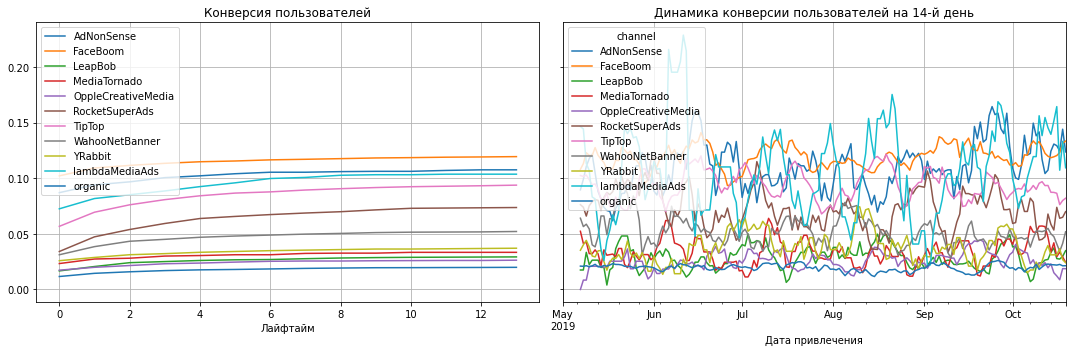

In [54]:
# смотрим конверсию с разбивкой по рекламным источникам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

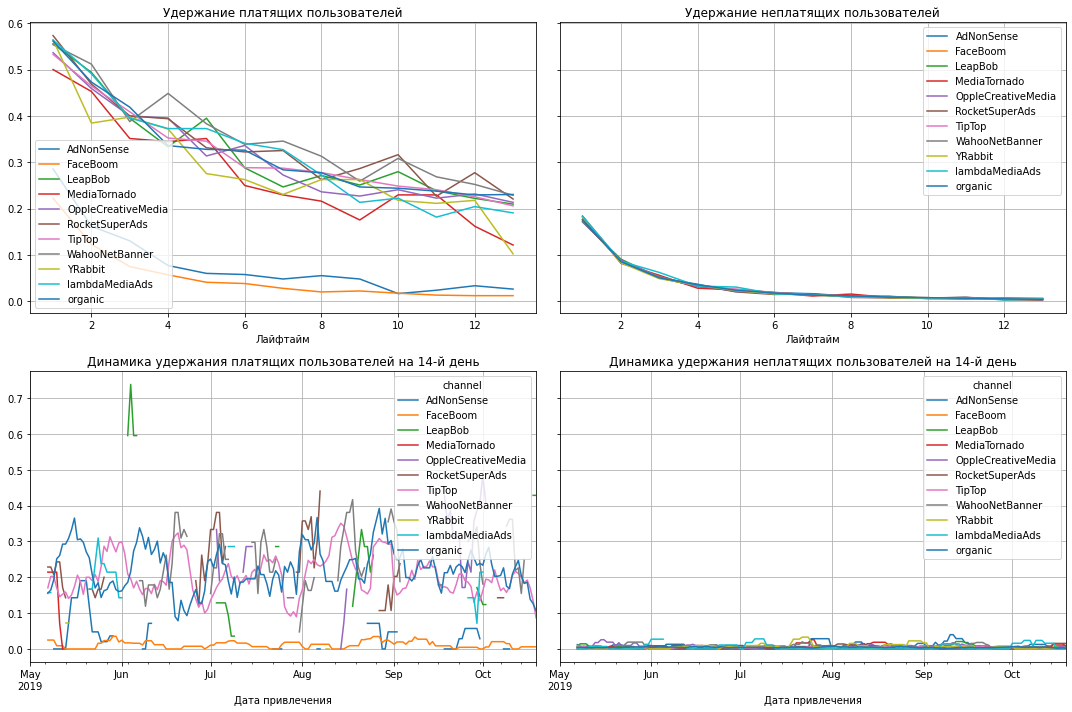

In [55]:
# смотрим удержание с разбивкой по рекламным источникам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

- Конверсия пользователей по рекламным источникам

Выше всех конверсия 14-го дня у пользователей, привлеченных через FaceBoom и AdNonSense. Вместе с тем, динамики увеличения конверсии не прослеживается ни у одного рекламного источника.

- Удержание пользователей по рекламным источникам

Для большинства категорий недостаточно данных, чтобы сделать полные выводы об удержании пользователей. Однако очевидно, что ниже всех удержание у пользователей, привлеченных через FaceBoom. 

### Окупаемость рекламы среди пользователей из США по рекламным источникам и устройствам

Как удалось выяснить, именно из США большая часть платящих пользователей, но именно в отношении пользователей США реклама не окупается.

Более детально посмотрим окупаемость рекламы пользователей из США.

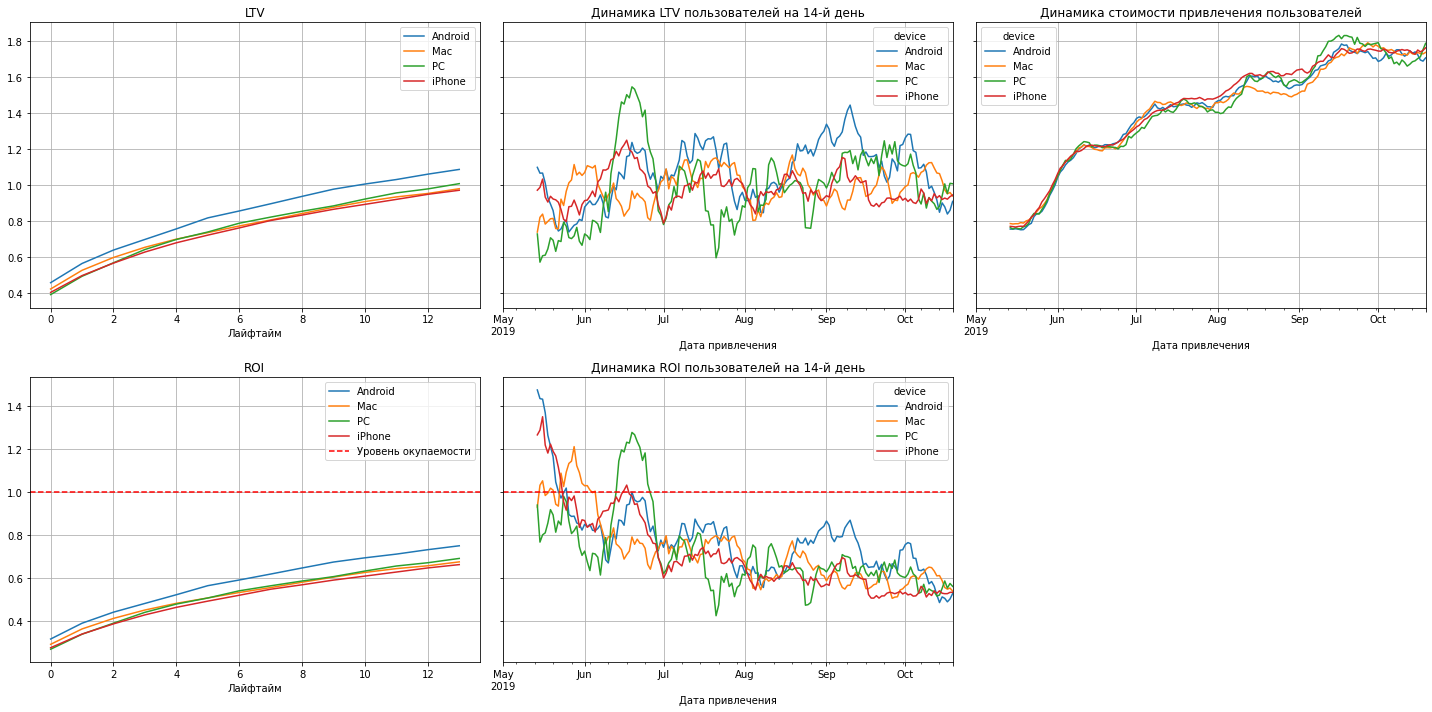

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payers.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

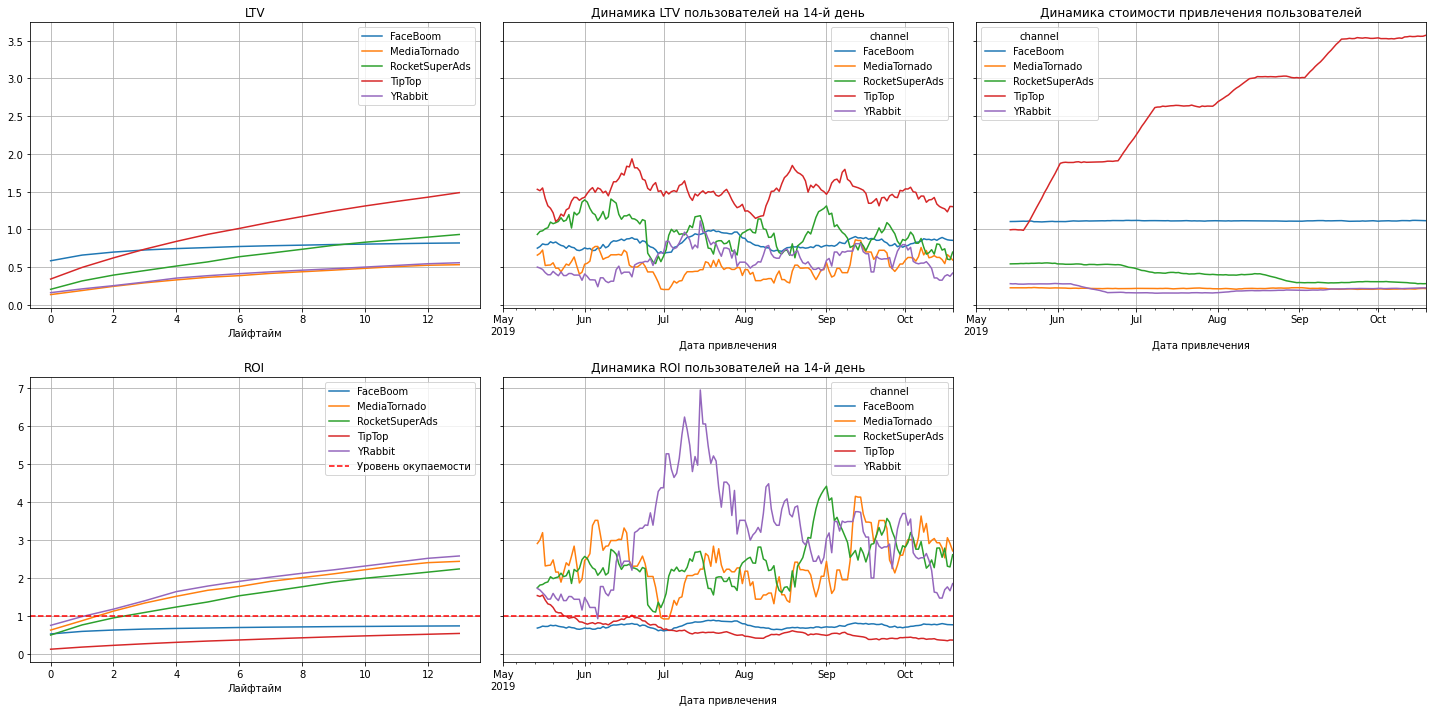

In [57]:
# смотрим окупаемость в США с разбивкой по рекламным источникам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payers.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

Не окупилась реклама в отношении пользователей США с любого устройства. 
При этом среди 5 рекламных источников, которые использовались для привлечения пользователей в США, только реклама через двух лидеров - TipTop и FaceBoom - не окупилась. У TipTop такие результаты даже при том, что на данный рекламный источник в анализируемый период сильно росли затраты.

### Вывод. Окупаемость рекламы

Приложение не окупается из-за низких показателей ROI. Указанное может быть вызывано ростом рекламных затрат на несколько каналов, которые не показали роста удержания платящих клиентов.

**По результатам анализа ключевых бизнес-показателей приложения по всем признакам можем выделить следующую тенденцию:**

Категория пользователей с высокими (выше остальных) и достаточно положительными показателями LTV и конверсии показывают убыточный ROI, низкое удержание и вместе с тем высокую стоимость привлечения:

- среди стран - это США;
- среди устройств - это Mac и iPhone;
- среди рекламных источников - можно выделить AdNonSense, TipTop, FaceBoom.

Ответим на ключевые вопросы по окупаемости рекламы:

**1) Окупается ли реклама, направленная на привлечение пользователей в целом?**

Нет, реклама в целом не окупается. Вместе с тем, мы имеем явный рост рекламных расходов.
Показатель окупаемости инвестиций (ROI) к концу периода окупаемости (14 дней) не подошел к уровню окупаемости и составил чуть выше 80%. С конца июня показатели окупаемости снижаются.


**2) Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

**- Устройства**

Все устройства, кроме PC, не окупаются. При этом, возможно, окупаемость пользователей PC вызвана достаточно низкой динамикой стоимости привлечения.
Стоит обратить внимание на количество инвестиций в привлечение тех пользователей, которые используют Mac и iPhone.
Стоимость привлечения пользователей с такими устройствами растет, при этом динамика окупаемости снижается.
Несмотря на лучшую среди всех устройств конверсию, удержание пользователей данных категорий ниже остальных.

**- Страны**

Наиболее негативное влияние на окупаемость рекламы оказывает низкая окупаемость пользователей из США (которые при этом, представляют большинство приходящих пользователей приложения). При высоком LTV, стоимость привлечения таких пользователей не окупается.
Несмотря на хорошую конверсию, у платящих пользователей из США низкое удержание.


**- Рекламные источники**

Неэффективной представляются инвестиции в лидирующие рекламные источники: TipTop и FaceBoom. В рекламу через ТipTop вложено очень много инвестиций, и стоимость привлечения сильно росла. Однако реклама через данный источник так и не окупилась.  


**3) Чем могут быть вызваны проблемы окупаемости?**

Проблемы окупаемости могут быть вызваны тем, что при вложениях в конкретный рекламных источник не учитывается географическое положение пользователя и устройство, которое он использует. 
К примеру, в США рекламный канал TipTop с самыми высокими затратами не окупается, но при этом, окупается реклама из других источников - RocketSuperAds, MediaTornado,YRabbit, в которые не было больших инвестиций.

## Общий вывод и рекомендации



В рамках данного проекта был проведен анализ ключевых бизнес-показателей реализации приложения "Procrastinate Pro+".  Была исследована информация трех датасетов о посещениях сайта, о расходах на рекламу и о заказах.


Для проведения анализа был установлен момент анализа как 01.11.2019, а горизонт анализа - 14 дней, исходя их того, что в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

**Общий анализ. Предобработка**

Была проведена проверка датасетов на пропуски, дубликаты, аномалии и выбросы. Данные в датасетах корректные, ни пропусков, ни других искажений в данных выявлено не было. 

В некоторых столбцах был тип данных был изменен на корректный. Тип данных в столбцах с данными о дате и времени был приведен к формату `datetime`.

Названия столбов датасетов были приведены к единому стилю для удобства работы с ними. Новые столбцы в датасеты не добавлялись. Количество строк и столбцов после предобработки ни в одном датасете не изменилось.


Для проведения исследования данных и последующего анализа маркетинговых показателей были использованы специальные функции.

На основе данных, содержащихся в датасетах, были собраны профили пользователей, с помощью которых были рассчитаны ключевые показатели, построены графики и проведен анализ.

**В рамках исследовательского анализа данных было определено:** 
- пользователи привлекаются из 4 стран: 3 страны Европы и США. Больше всего пользователей привлекается из США;
- пользователи используют 4 типа устройства, большая часть привлеченных пользователей использует iPhone;
- пользователи привлекаются из 10 платных рекламных источников, также большое количество пользователей приходят самостоятельно (бесплатно). Больше всего пользователей через рекламу пришло от FaceBoom и TipTop. 
США лидирует и по количеству привлеченных, и по количеству платящих и по доле платящих пользователей. Самая высокая доля платящих пользователей среди тех, кто использует ОС Mac и iPhone. Высокая доля пользователей пришла через рекламу FaceBoom, AdNonSense и lambdaMediaAds.


**В рамках маркетингового анализа было выявлено:**
- Больше всего затрат на рекламу уходит на рекламные источники TipTop (52% всех расходов), FaceBoom(31% всех расходов). 

**В рамках оценки окупаемости рекламы было выявлено:**
- реклама в целом не окупается. Показатель окупаемости инвестиций составляет только 80% от необходимого для достижения хотя бы уровня безубыточной.
- общая конверсия пользователей к 14 дню около 5.5%.
- общее удержание платящих пользователей к 14 дню около 12%.

**По результатам анализа бизнес-показателей по разным категориям было выявлено:**

- По устройствам

Большие инвестиции на рекламу для пользователей Mac и iPhone не окупаются. Среди устройств рекламные затраты окупились только у PC, при том, что сама стоимость привлечения клиентов с PC была ниже остальных.

- По странам

Инвестиции в рекламу для пользователей из США не окупаются. Это результат очень высокого размера рекламных расходов для пользователей данной категории. 

При этом привлечение пользователей из других стран окупается. Показатели стоимости привлечения пользователей из других стран значительно ниже, а вот окупаемость инвестиций выше уровня безубыточности. Вместе с тем, исходя из имеющихся данных компания не направлена на увеличение аудитории из Европы, что могло бы способствовать увеличению прибыли.


- По рекламному источнику

Большие инвестиции в TipTop и FaceBoom не окупаются. Стоимость привлечения клиента через TipTop в несколько раз выше стоимости привлечения из других источников, но окупаемость одна из самых низких и не достигает уровня безубыточности.


**Ключевые причины неэффективности привлечения пользователей**

В качестве ключевых причин неэффективности можно выделить:

- большие инвестиции в рекламные каналы без учета географического признака. В частности, высокая стоимость привлечения через каналы FaceBoom и TipTop в США и недооценка других каналов, которые популярнее в этой стране.
- низкое удержание платящих пользователей рекламных каналов FaceBoom, TipTop и AdNonSense, в которые вкладывается много инвестиций.
- минимальная окупаемость рекламного канала TipTop, при огромных вложениях в него.
- большие инвестиции в рекламу для пользователей Mac и iPhone, которые не окупаются и удерживаются хуже остальных. 

**Рекомендации для отдела маркетинга**

- Стремиться к увеличению показателей удержания пользователей

При среднем коэффициенте удержания пользователей на 14 день только в 12% следует обратить внимание не на привлечение постоянно новых клиентов, а на действия по увеличению длительности использования приложения уже привлеченными клиентами.

- Снизить затраты на рекламу для пользователей США. Увеличить рекламу для пользователей из других стран

США - единственный из 4 пользовательских регионов, который не окупился. Этот же регион имеет самую дорогую стоимость привлечения. Несмотря на самую высокую долю привлеченных пользователей, у США самое низкое удержание. Стоит обратить внимание на другие страны и использовать иные рекламные источники, которые могут быть актуальны для соответствующих территорий. Также нужно стремиться к увеличению удержания пользователей из США, а не просто увеличению числа привлеченных пользователей этой страны.


- Снизить затраты на рекламу для FaceBoom и TipTop. Не концентрировать все рекламные затраты в одном рекламном источнике

В данные рекламные источники (особенно в TipTop - более 50% от всех трат) были сделаны огромные в сравнении с остальными рекламные инвестиции, которые даже не привели к достижению уровня безубыточности. При этом другие источники (7 из 10) оказались выше уровня окупаемости. Следует обратить внимание на другие рекламные источники.

- Обратить внимание на пользователей PC

Пользователи использующие PC, в отличие от остальных, приносят прибыль, однако имеют низкую конверсию и менее всего представлены среди всех пользователей по типам устройств. Возможно, конверсия снижена из-за недоступности каких-либо функций приложения. 


- Учесть географический признак при выборе рекламного источника


Необходимо обратить внимание на иные каналы привлечения пользователей, которые актуальны для жителей США. Стоит уменьшить затраты на рекламу для пользователей США через рекламные источники FaceBoom и TipTop, у которых самые низкие показатели в этой стране.

Например, для рекламы в США можно обратить внимание на RocketSuperAds, MediaTornado и YRabbit. 